# Tensor Networks: Exploration of Performance of Classical Machine Learning Algorithms and Tensor Networks  - Loan Dataset

The is the first of the three experiments that are conducted to explore the functionality of Tensor Networks as compared to classical machine learning algorithms and state-of-the-art deep neural networks. Our working hypothesis is that the Tensor Network framework outperforms clasical machine learning techniques and deep neural networks across different data formats within the paradigm of supervised learning, and across variable data set regimes. 

To investigate the credibility and validity of our hypothesis we will perform a series of experiments where we consider different types of data sets, which are  

- High-dimensional tabular data
- Image datasets 
- Embedding relations (sequential datasets)

There are four main objectives of this study in regards to the architecture of Tensor Networks:

- For a given machine learning task, explore the number of trainable parameters of Tensor Networks and deep neural networks that are required to achieve a prior perfomance requirements. 
- For a given machine learning task, evaluate the amount of training time required by Tensor Networks and deep neural networks to achieve the state-of-the-art perfomance. 
- Explore the perfomance of Tensor Networks across different data set size regimes, in particular we will investigate the performance of Tensor Networks against classical machine learning algorithms in small data set size ranges, and their performance in relation to deep learning techniques in large data set sizes. 
- Ascertain the general performance of Tensor Networks against standard machine learning algorithms across different qualitative data types: structured and unstructured data within the context of classification tasks (machine learning).

## Experiment 1: Exploration of Tensor Networks, Classical Machine Learning Algorithms, and Deep Neural Networks across Variable Dataset Regimes in Tabular Data.

In this notebook, we will evaluating the performance of different machine learning frameworks across different dataset sizes. We will be using a high-dimensional dataset called the Otto Group Product Classification dataset which was obtained directly from Kaggle. We will first apply data processing and cleaning techniques to the data to ensure that it is suitable for modelling building purposes. Thereafter, we will perform some data exploration which include feature importance and dimensionality reduction, to better visualise the data. Finally, we will build a set a classical machine learning models and deep neural networks and compare their performance. In this case, we will ensure that the data is balanced for each training iteration and use standard classification accuracy to measure performance. 

# 1. Importing the libraries

In [100]:
#importing library for dataframes
import pandas as pd

#importing library for matrix calculus
import numpy as np

#import library for visualization
import seaborn as sns
import matplotlib.pyplot as plt

#for handling outliers
from scipy.stats.mstats import winsorize

#for binning features
import jenkspy

#for splitting the data
from sklearn.model_selection import train_test_split

#imoirt library for data standardization
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#library for encoding categoricla variable
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

#import feature selection and importance library
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy
from sklearn.feature_selection import mutual_info_classif

#import library for dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from umap import UMAP

#miscellaneous
import random
import joblib

pd.set_option('display.max_columns', 30)

## 2. Viewing the dataset

In [101]:
#importing dataset into a dataframe
data = pd.read_csv(r'C:\Users\mpumi\Desktop\Masters Thesis Experiments\Applications of TN - Tabular Datasets\Otto or Loan Dataset\data\raw\Loan_default.csv')

In [102]:
#viewing the dataset
data.head()

LoanID  Age  Income  LoanAmount  CreditScore  MonthsEmployed  \
0  I38PQUQS96   56   85994       50587          520              80   
1  HPSK72WA7R   69   50432      124440          458              15   
2  C1OZ6DPJ8Y   46   84208      129188          451              26   
3  V2KKSFM3UN   32   31713       44799          743               0   
4  EY08JDHTZP   60   20437        9139          633               8   

   NumCreditLines  InterestRate  LoanTerm  DTIRatio    Education  \
0               4         15.23        36      0.44   Bachelor's   
1               1          4.81        60      0.68     Master's   
2               3         21.17        24      0.31     Master's   
3               3          7.07        24      0.23  High School   
4               4          6.51        48      0.73   Bachelor's   

  EmploymentType MaritalStatus HasMortgage HasDependents LoanPurpose  \
0      Full-time      Divorced         Yes           Yes       Other   
1      Full-time       Married          No            No       Other   
2     Unemployed      Divorced         Yes           Yes        Auto   
3      Full-time       Married          No            No    Business   
4     Unemployed      Divorced          No           Yes        Auto   

  HasCoSigner  Default  
0         Yes        0  
1         Yes        0  
2          No        1  
3          No        0  
4          No        0

In [103]:
#exploring the features (in details) an datatype
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

Comment: The dataset contains 94 features and target variables. With the exception of the ID and target variable, all features are categorical (representing the count event associated with each sample or product). Moreover, the training dataset contains about 62 000 data samples and has a size of 44.8 MB.

## 3. Duplicate Values

In [104]:
#check for duplicates
data.duplicated().sum()

0

Comment: The dataset does not have any duplicates.

## 4. Missing Values

In [105]:
#checking for missing values
data.isna().sum()

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

Comment: The dataset has no missing values. So there is no imputation or elimination needed at this stage.

## 5. Univariate Analysis

### 5.1. Feature Analysis

### Numeric Features

In [106]:
num_cols = ['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed','InterestRate', 'DTIRatio']

c:\Users\mpumi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mpumi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mpumi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mpumi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na opti

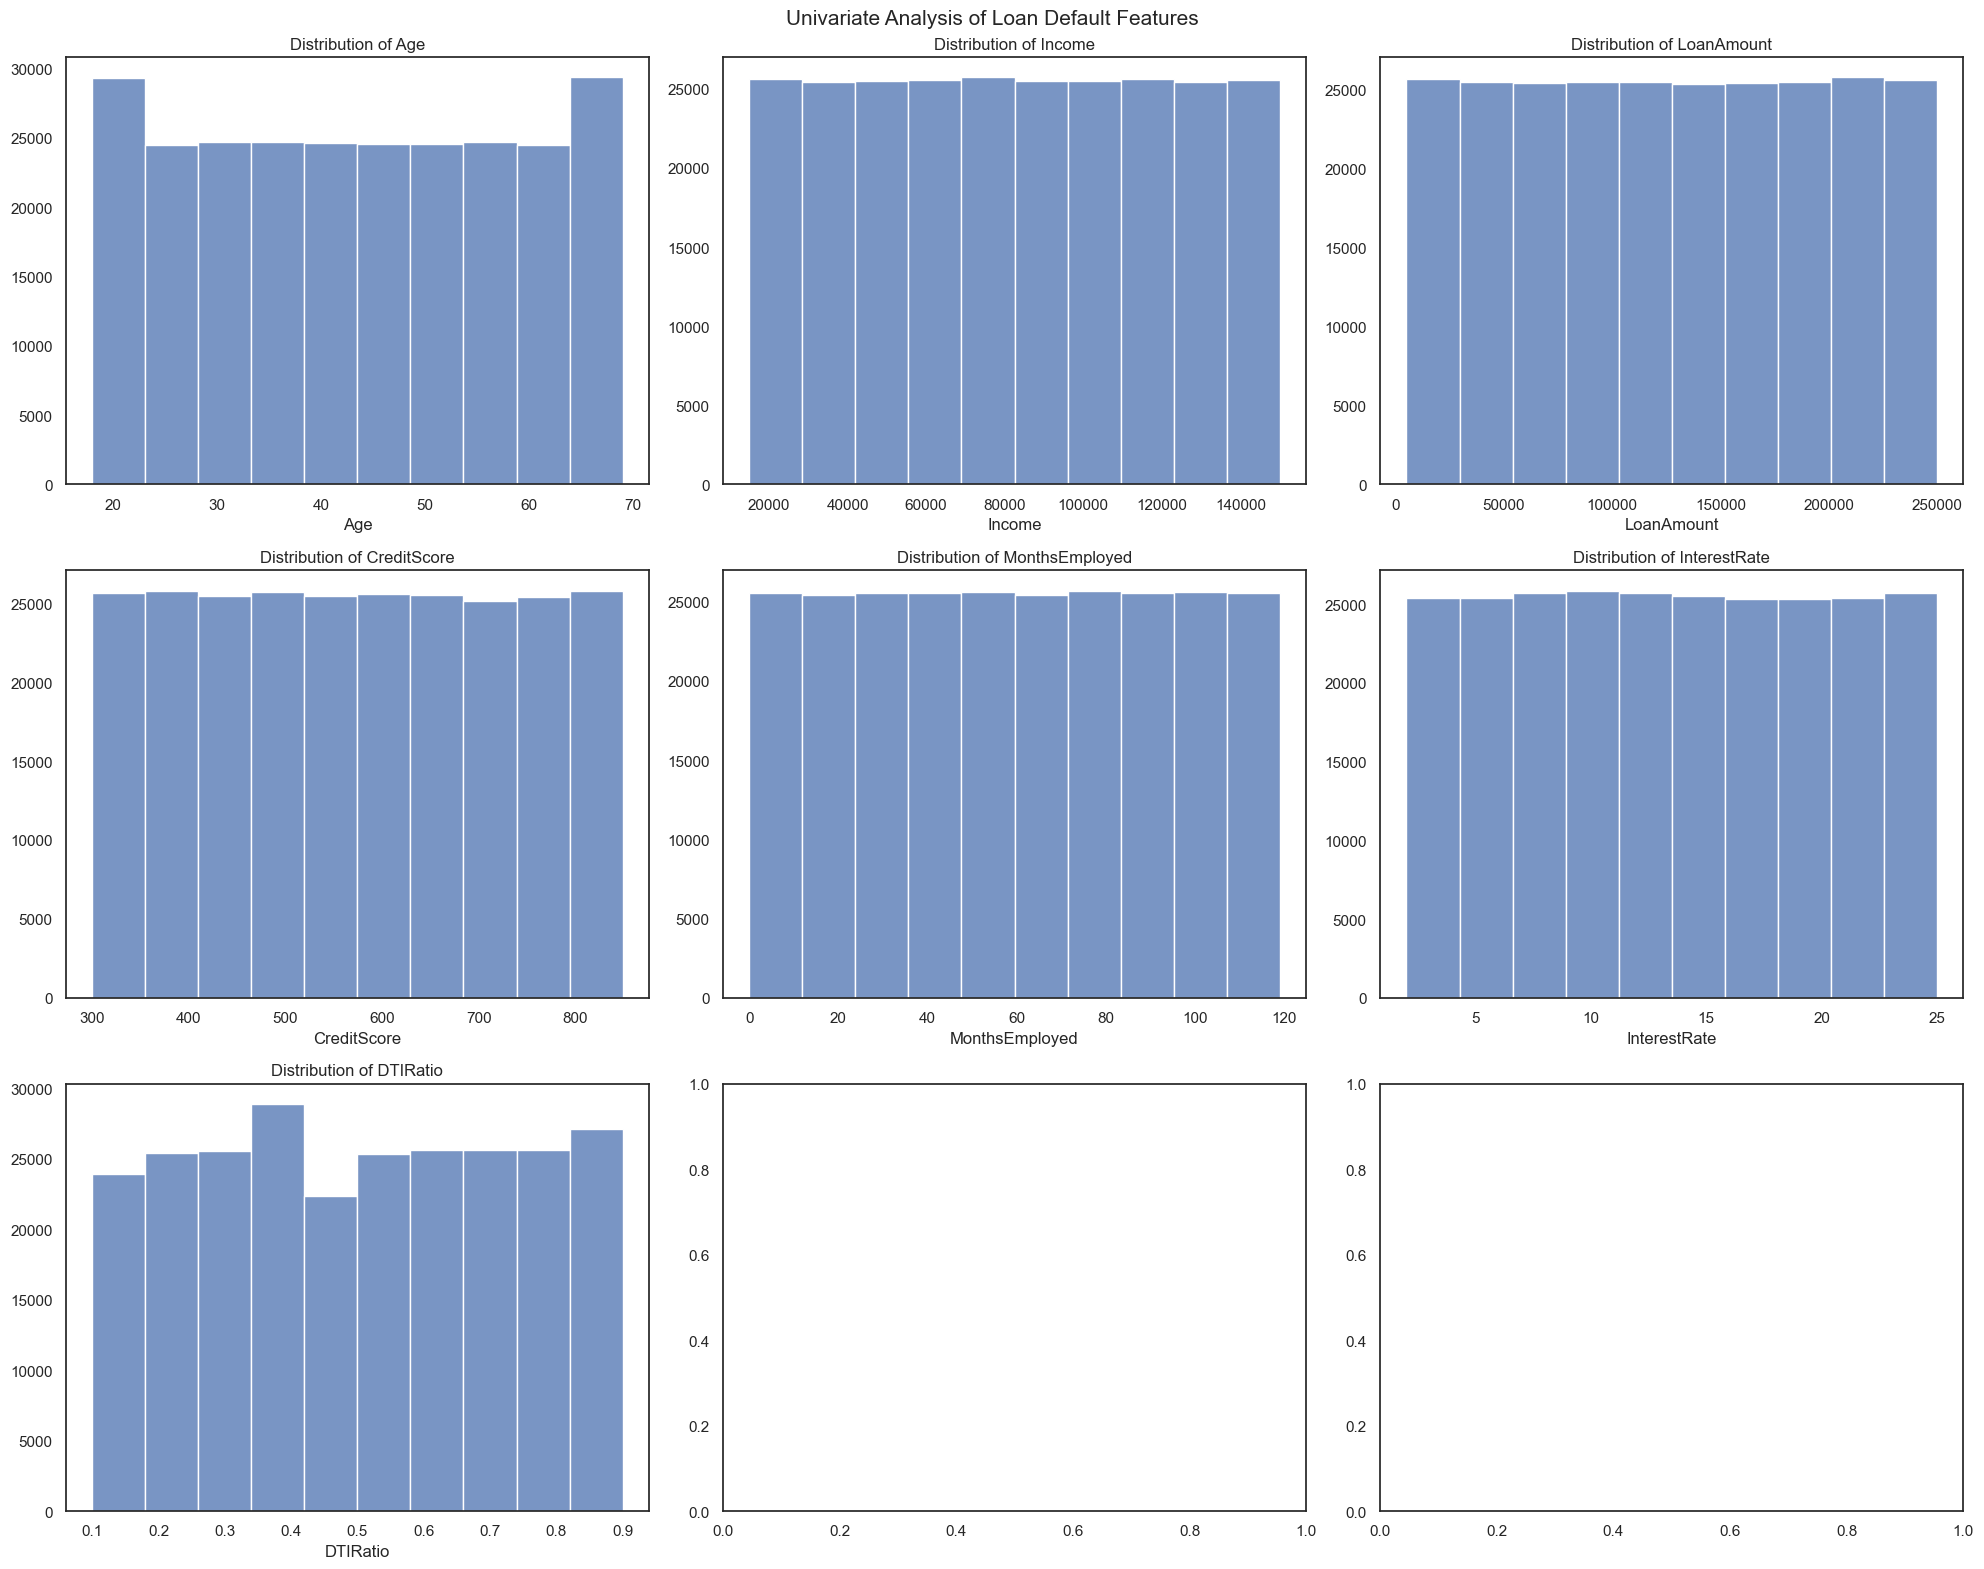

In [107]:
fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (20,16))
fig.suptitle('Univariate Analysis of Loan Default Features', fontsize = 15)

axes = axes.flatten()

for i, column in enumerate(num_cols):
    sns.histplot(data = data[num_cols], x = column, bins = 10, ax = axes[i]) 
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(f'{column}')
    axes[i].set_ylabel('')
    
plt.tight_layout()
plt.subplots_adjust(top = 0.95)
plt.show()    

**Comment**: The features: `Age`, `Income`, `LoanAmount`, `CreditScore`, `MonthsEmployed`, `InterestRate` and  `DTIRatio` are uniformly distrubted and do not exhibit extreme or outlier values. Thus, we will normalise the features to lie within the `[0,1]` range, to speed up convergence during the modelling phase.

c:\Users\mpumi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mpumi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mpumi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mpumi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

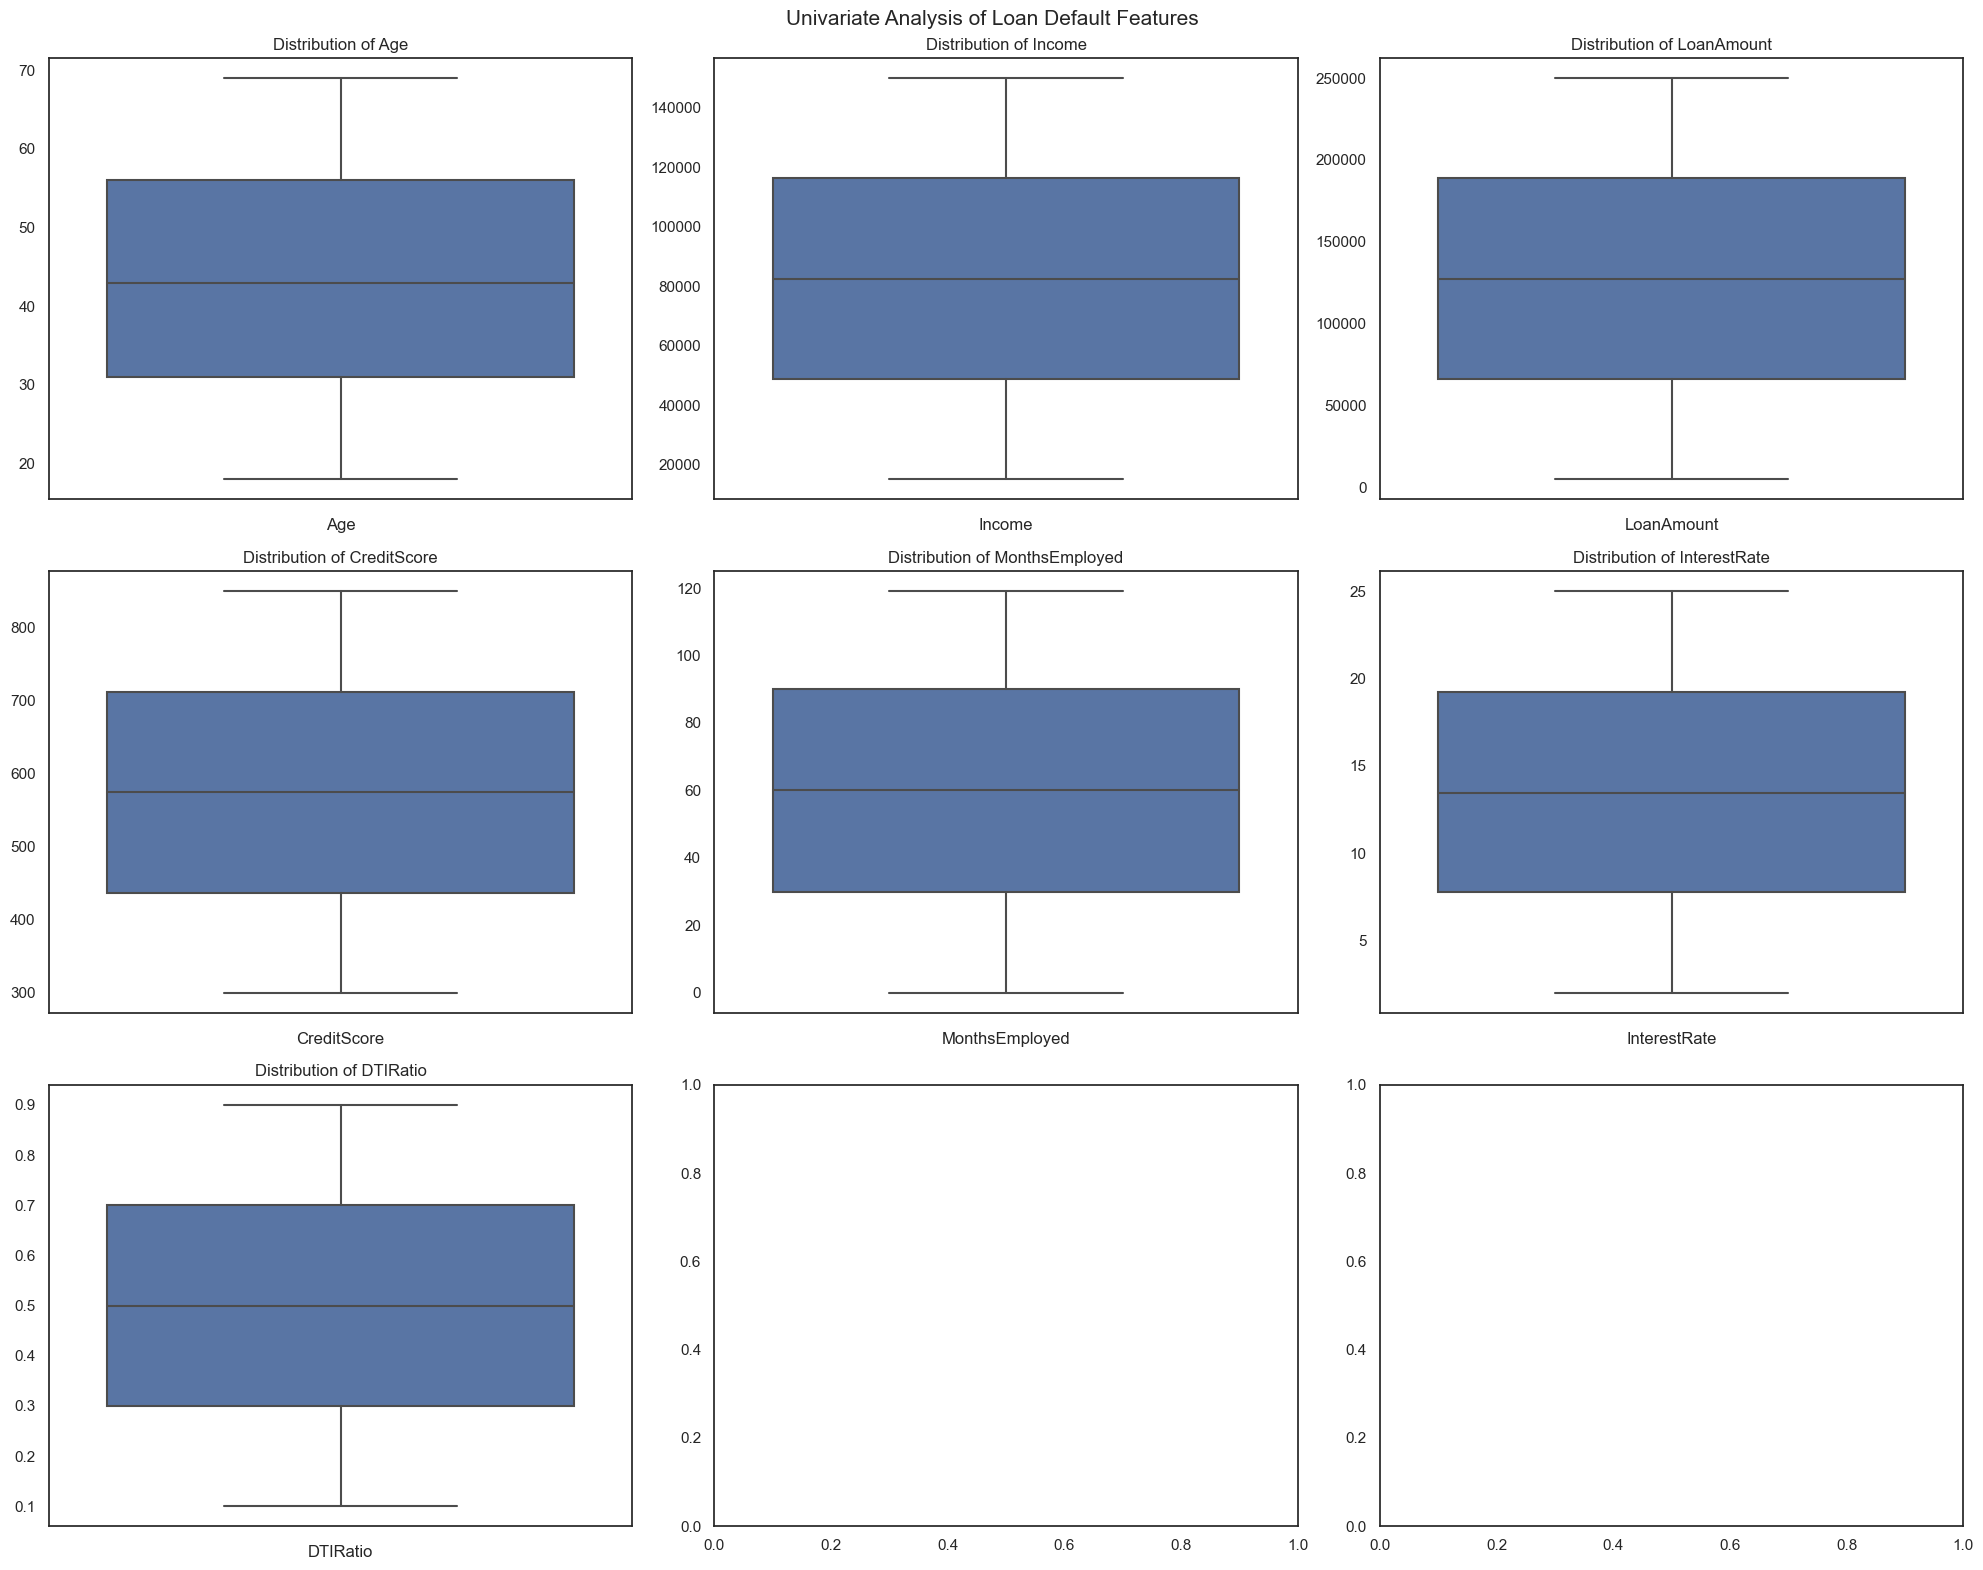

In [108]:
fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (20,16))
fig.suptitle('Univariate Analysis of Loan Default Features', fontsize = 15)

axes = axes.flatten()

for i, column in enumerate(num_cols):
    sns.boxplot(data = data[num_cols], y = column, ax = axes[i]) 
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(f'{column}')
    axes[i].set_ylabel('')
    
plt.tight_layout()
plt.subplots_adjust(top = 0.95)
plt.show()

#### Discrete Variables

In [109]:
discrete_cols = ['NumCreditLines','LoanTerm']

c:\Users\mpumi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mpumi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mpumi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mpumi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

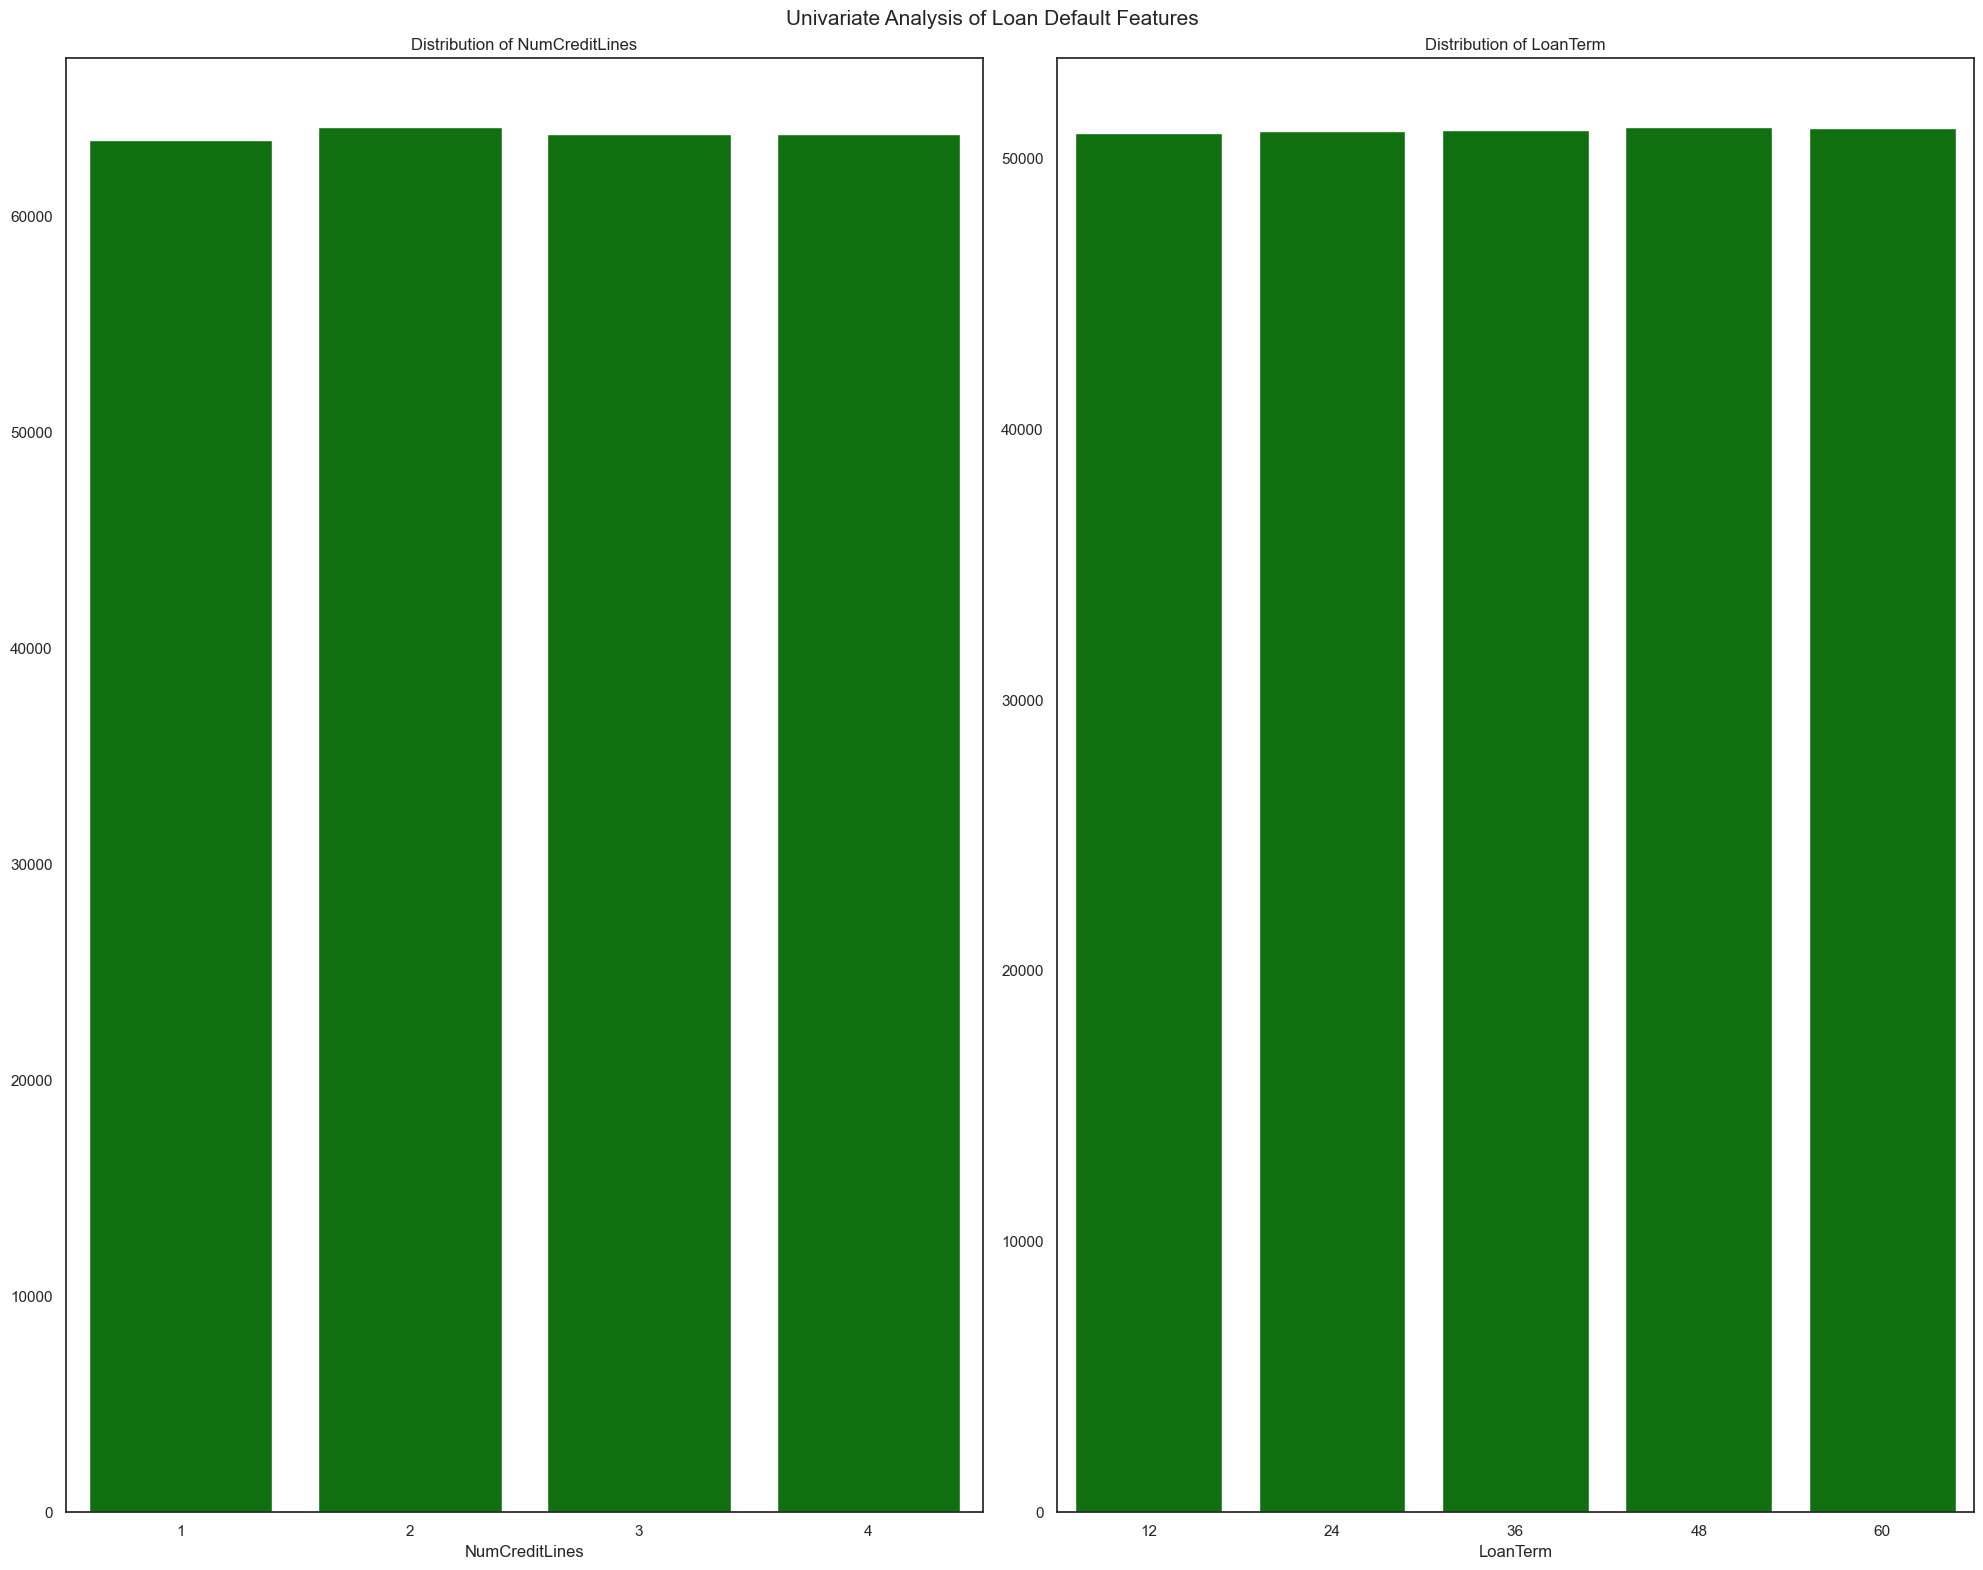

In [110]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20,16))
fig.suptitle('Univariate Analysis of Loan Default Features', fontsize = 15)

axes = axes.flatten()

for i, column in enumerate(discrete_cols):
    sns.countplot(data = data[discrete_cols], x = column, color = 'green', ax = axes[i]) 
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(f'{column}')
    axes[i].set_ylabel('')
    
plt.tight_layout()
plt.subplots_adjust(top = 0.95)
plt.show()

**Comment**: `LoanTerm` and `NumOfCreditLines` are discrete features, and the values are almost evenly distributed across the categories for each feature.

#### Categorical Features

In [111]:
cat_cols = ['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage',
       'HasDependents', 'LoanPurpose', 'HasCoSigner']

c:\Users\mpumi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mpumi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mpumi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mpumi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

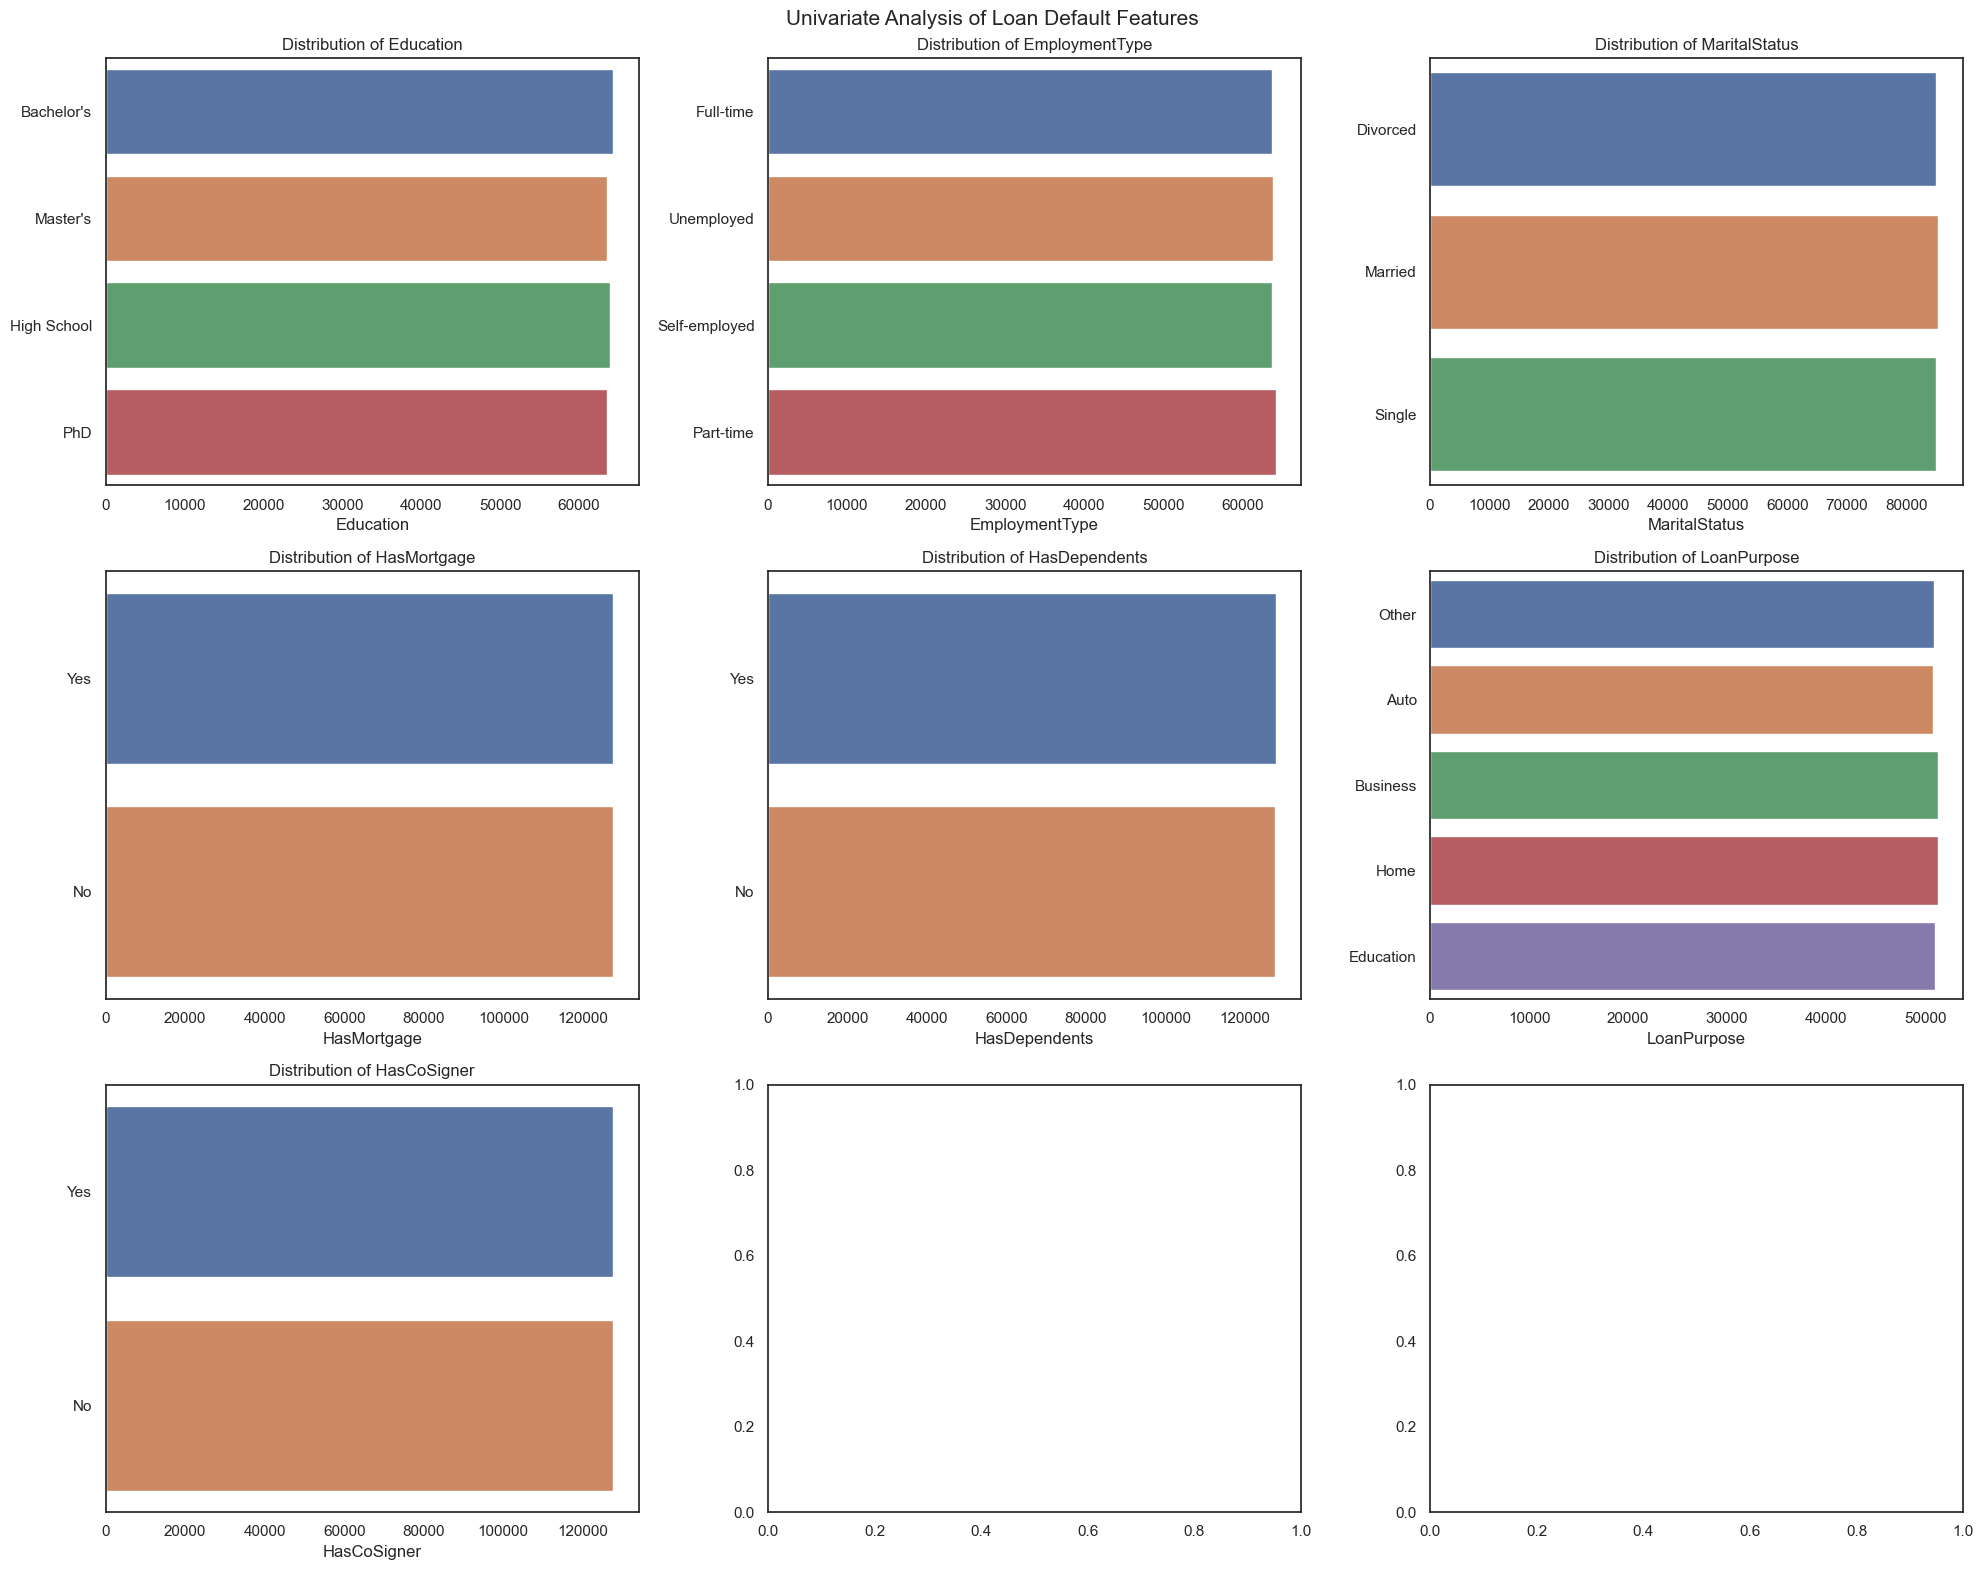

In [112]:
fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (20,16))
fig.suptitle('Univariate Analysis of Loan Default Features', fontsize = 15)

axes = axes.flatten()

for i, column in enumerate(cat_cols):
    sns.countplot(data = data[cat_cols], y = column, ax = axes[i]) 
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(f'{column}')
    axes[i].set_ylabel('')
    
plt.tight_layout()
plt.subplots_adjust(top = 0.95)
plt.show()

# 6. Bivariate Analysis

In [113]:
data.head()

LoanID  Age  Income  LoanAmount  CreditScore  MonthsEmployed  \
0  I38PQUQS96   56   85994       50587          520              80   
1  HPSK72WA7R   69   50432      124440          458              15   
2  C1OZ6DPJ8Y   46   84208      129188          451              26   
3  V2KKSFM3UN   32   31713       44799          743               0   
4  EY08JDHTZP   60   20437        9139          633               8   

   NumCreditLines  InterestRate  LoanTerm  DTIRatio    Education  \
0               4         15.23        36      0.44   Bachelor's   
1               1          4.81        60      0.68     Master's   
2               3         21.17        24      0.31     Master's   
3               3          7.07        24      0.23  High School   
4               4          6.51        48      0.73   Bachelor's   

  EmploymentType MaritalStatus HasMortgage HasDependents LoanPurpose  \
0      Full-time      Divorced         Yes           Yes       Other   
1      Full-time       Married          No            No       Other   
2     Unemployed      Divorced         Yes           Yes        Auto   
3      Full-time       Married          No            No    Business   
4     Unemployed      Divorced          No           Yes        Auto   

  HasCoSigner  Default  
0         Yes        0  
1         Yes        0  
2          No        1  
3          No        0  
4          No        0

c:\Users\mpumi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mpumi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mpumi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mpumi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na opti

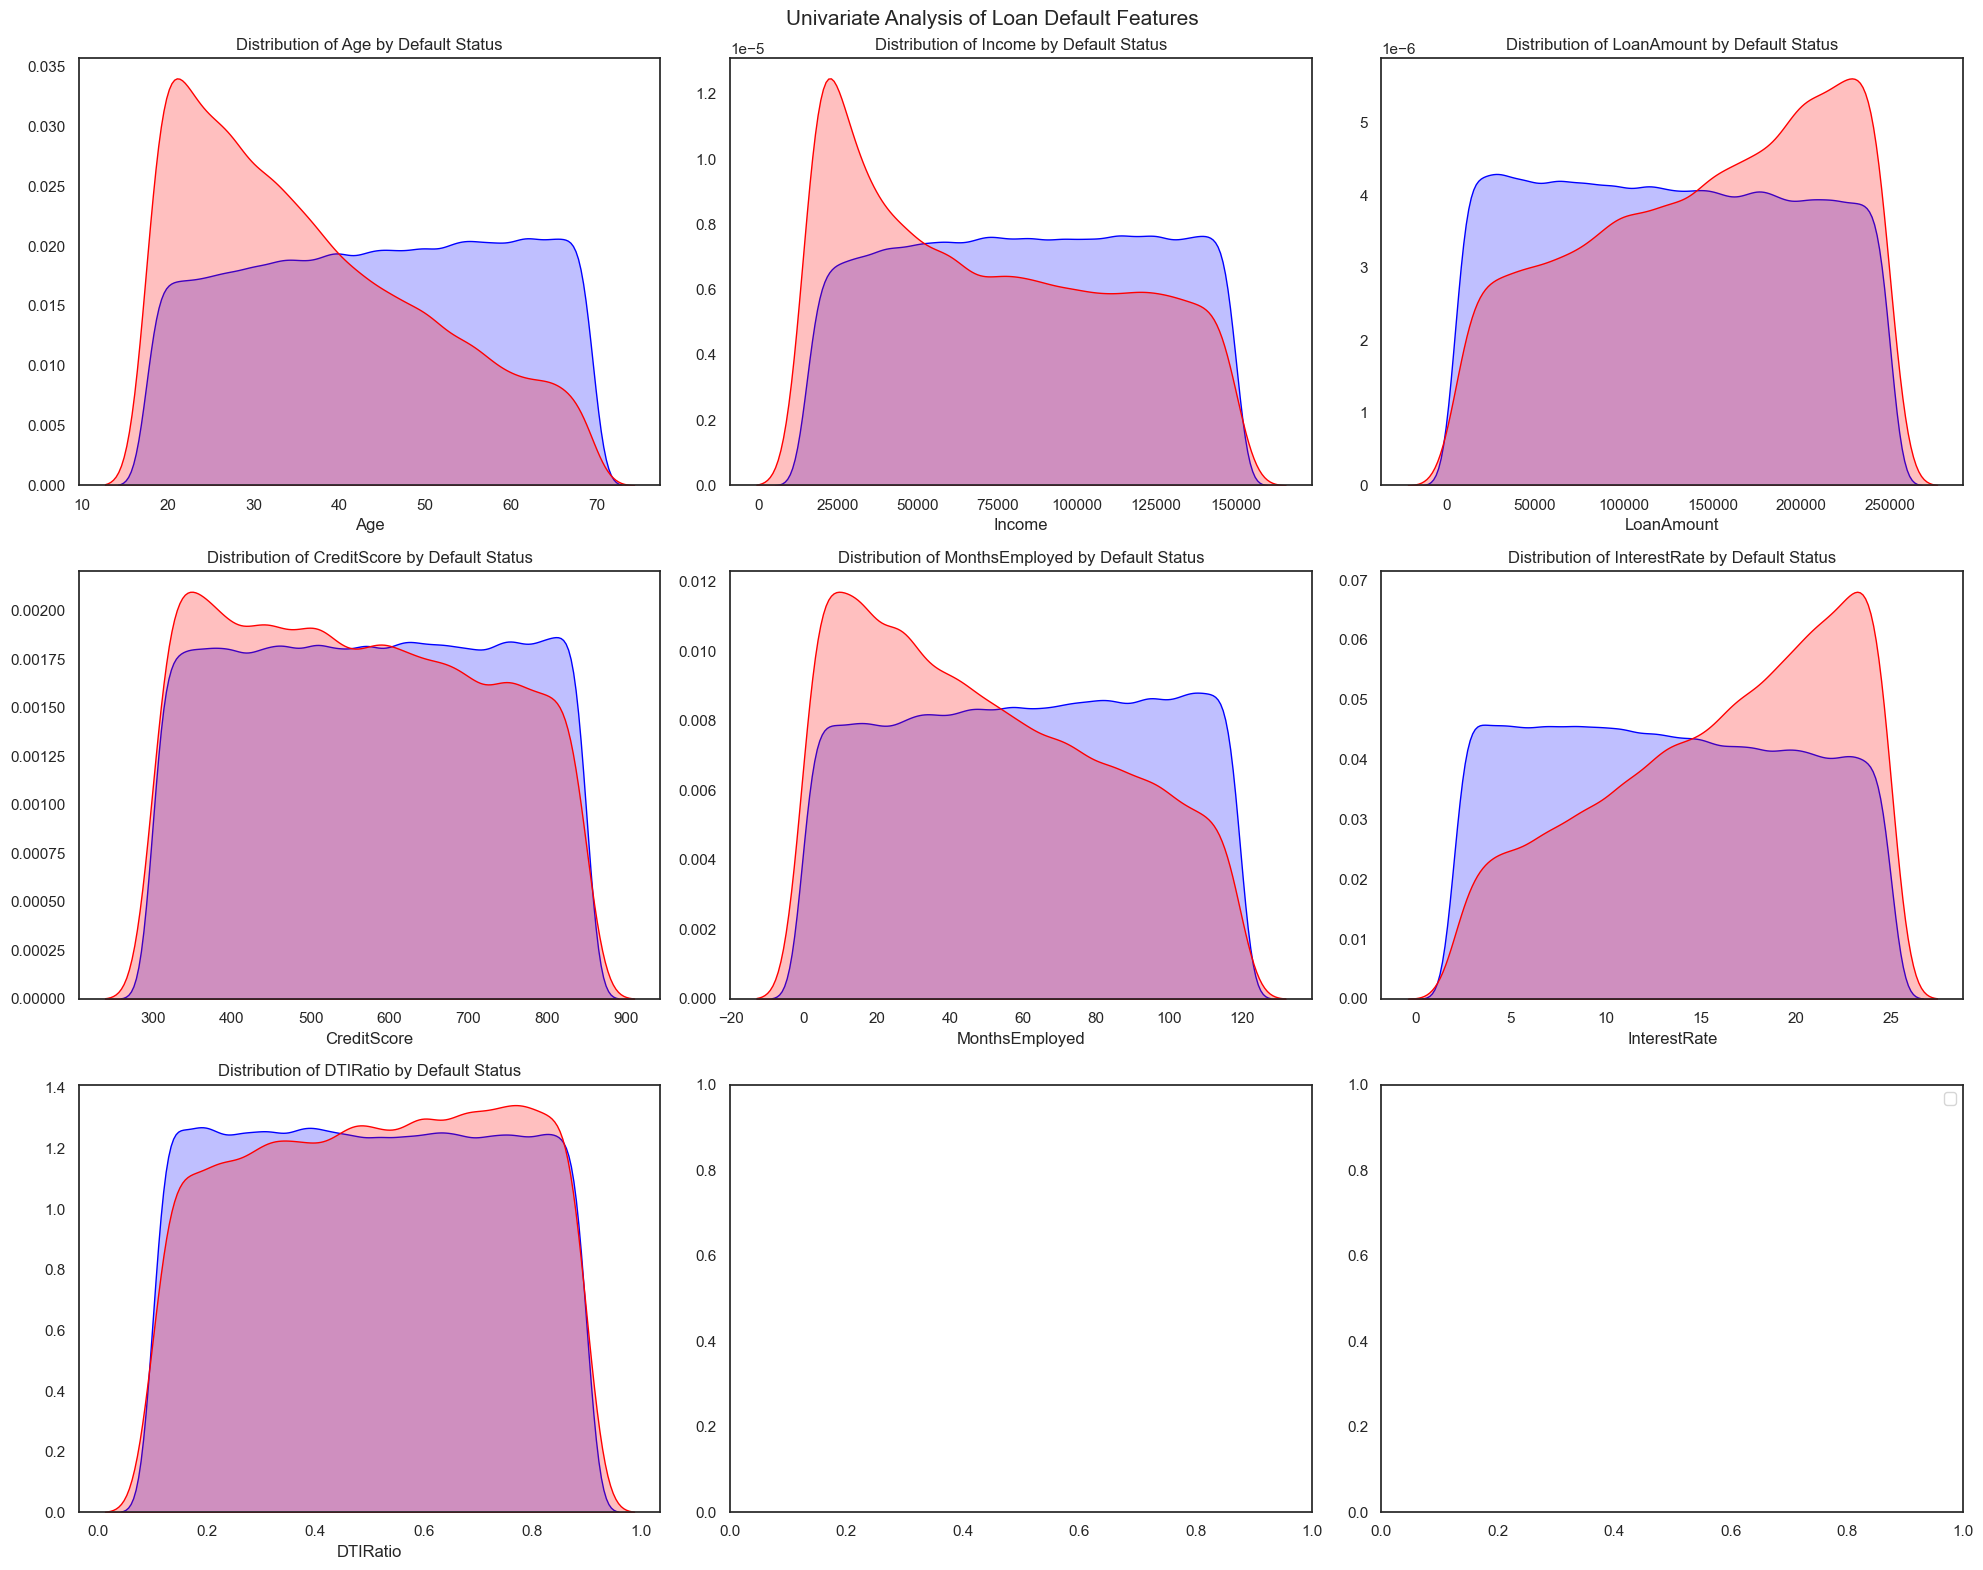

In [114]:
fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (20,16))
fig.suptitle('Univariate Analysis of Loan Default Features', fontsize = 15)

axes = axes.flatten()

for i, column in enumerate(num_cols):
    sns.kdeplot(data[data['Default']==0][column], color = 'blue', fill = True, ax = axes[i], label = 'Not Defaulted')
    sns.kdeplot(data[data['Default']==1][column], color = 'red', fill = True, ax = axes[i], label = 'Default')
    axes[i].set_title(f'Distribution of {column} by Default Status')
    axes[i].set_xlabel(f'{column}')
    axes[i].set_ylabel('')
    
plt.tight_layout()
plt.subplots_adjust(top = 0.95)
plt.legend(loc = 'best')
plt.show()

c:\Users\mpumi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mpumi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mpumi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mpumi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

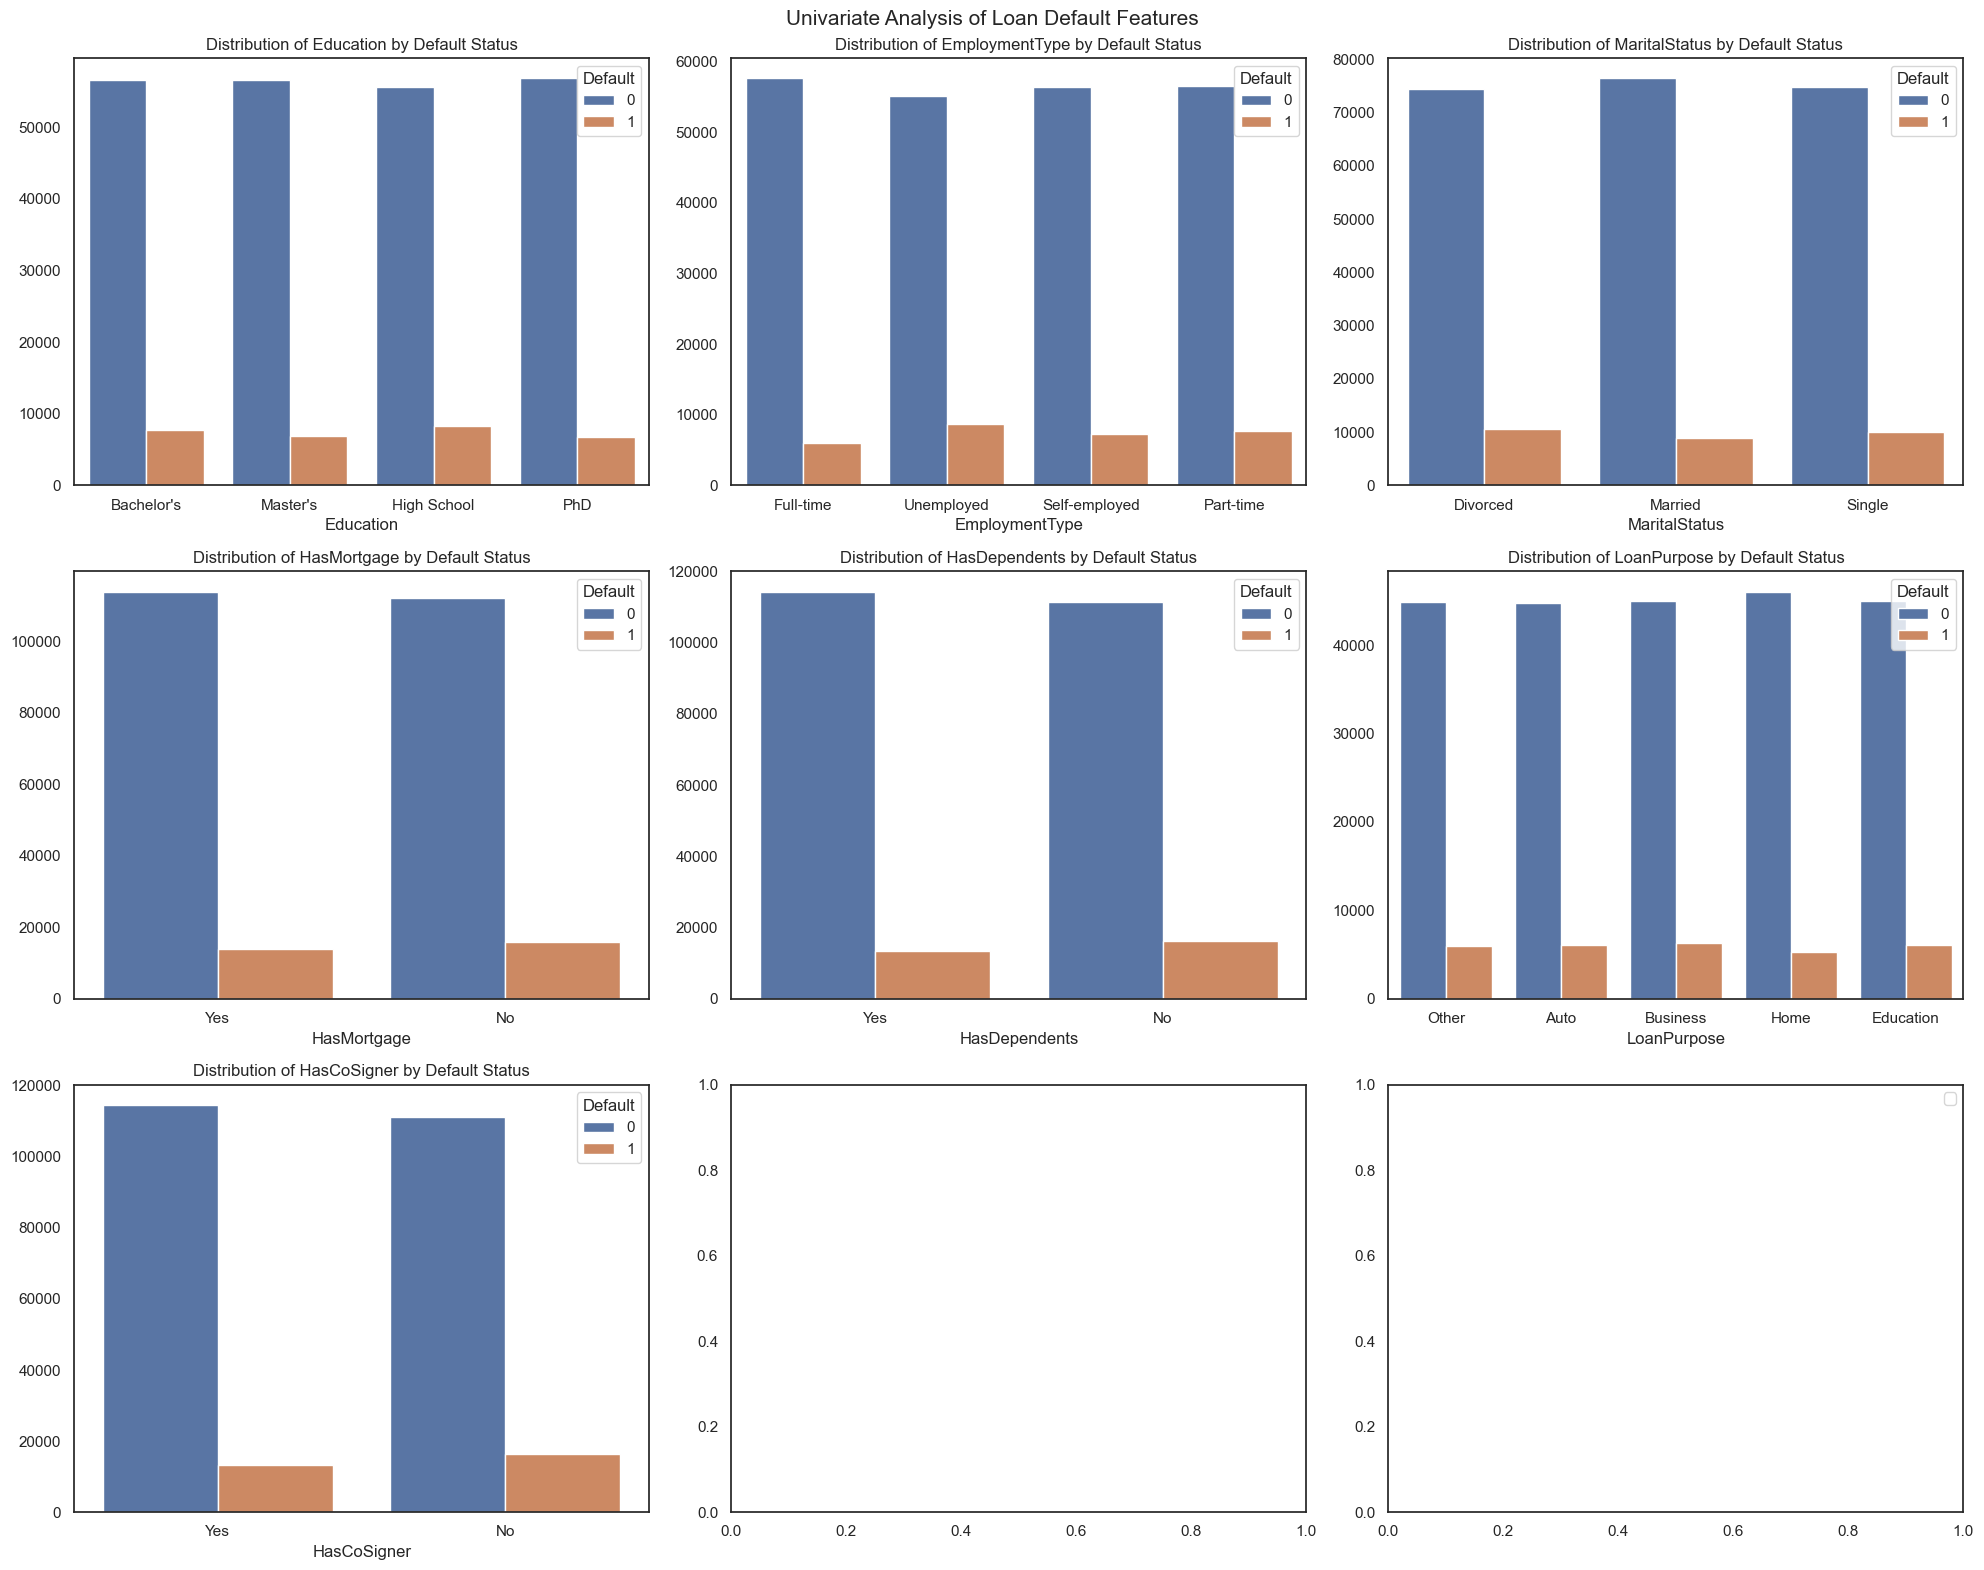

In [115]:
fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (20,16))
fig.suptitle('Univariate Analysis of Loan Default Features', fontsize = 15)

axes = axes.flatten()

for i, column in enumerate(cat_cols):
    sns.countplot(x = column, data = data, hue = 'Default', ax = axes[i])
    axes[i].set_title(f'Distribution of {column} by Default Status')
    axes[i].set_xlabel(f'{column}')
    axes[i].set_ylabel('')
    
plt.tight_layout()
plt.subplots_adjust(top = 0.95)
plt.legend(loc = 'best')
plt.show()

# 7. Correlation Analysis

In [116]:
#creating a function for correlation measures
def corr_display(data, correlation_measure = 'pearson'):
    sns.set_theme(style="white")

    # Compute the correlation matrix
    corr_ = data.corr(method = correlation_measure)

    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr_, dtype=bool))

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(230, 20, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr_, mask=mask, cmap=cmap, vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})
    plt.title('Correlation: ' + str.capitalize(correlation_measure))
    plt.show()

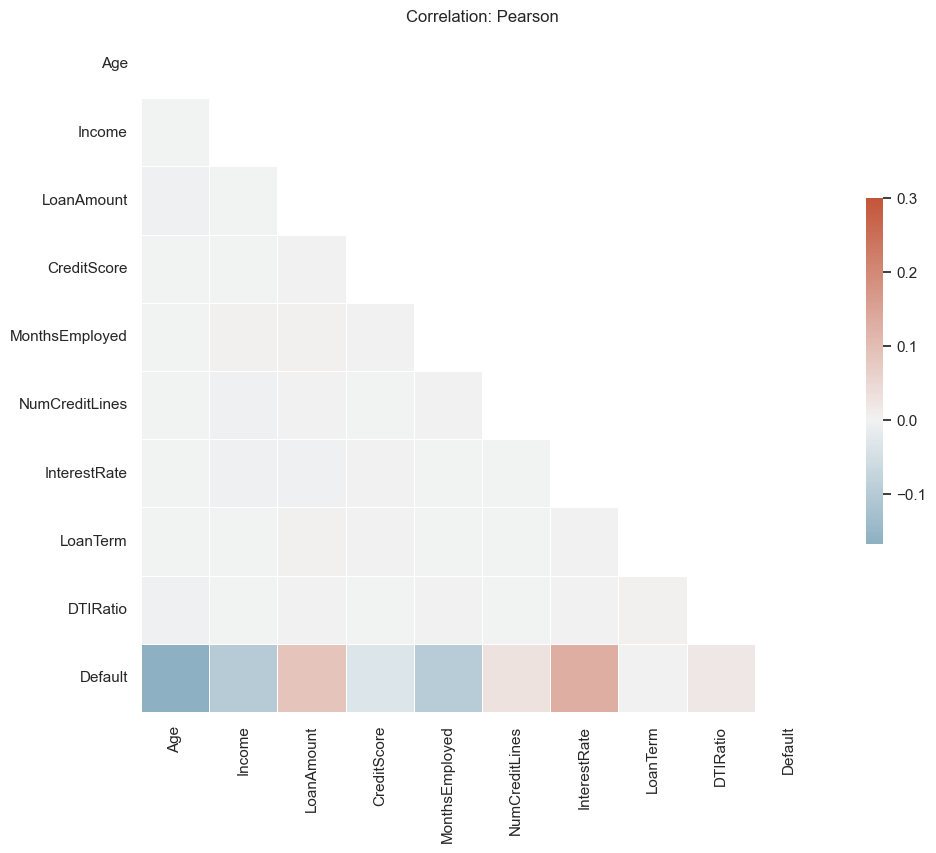

In [117]:
#evaluation correlation between features using Person method
corr_display(data.select_dtypes(exclude='object'))

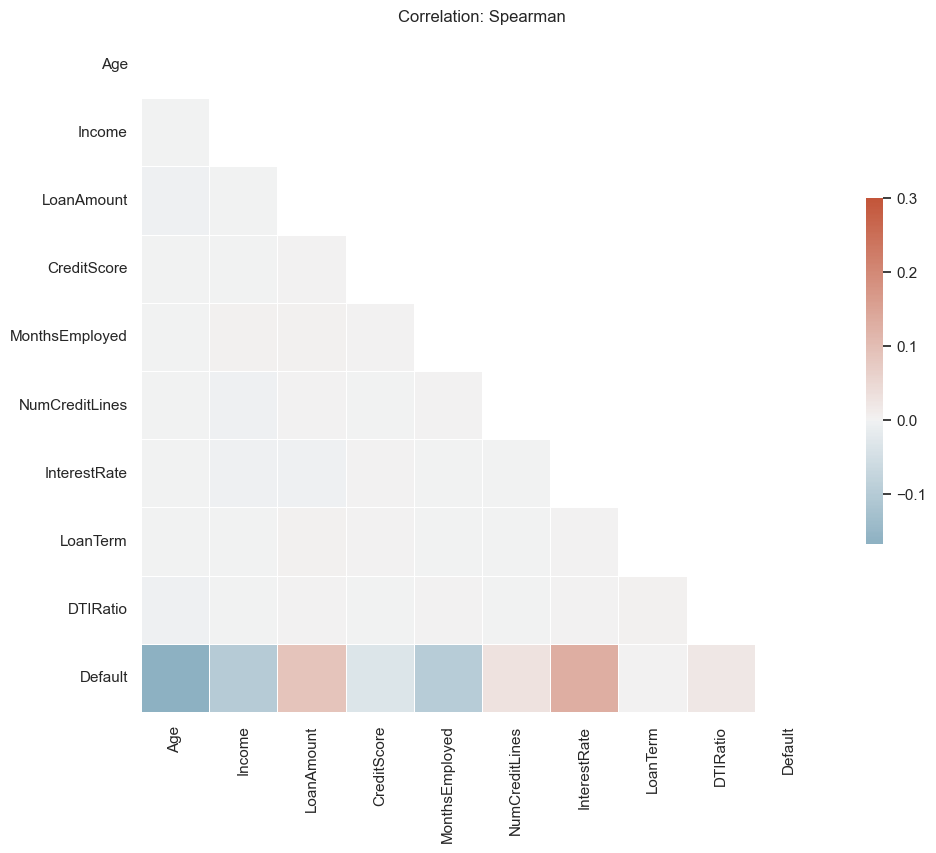

In [118]:
#evaluation correlation between features using Spearman's method
corr_display(data.select_dtypes(exclude='object'), 'spearman')

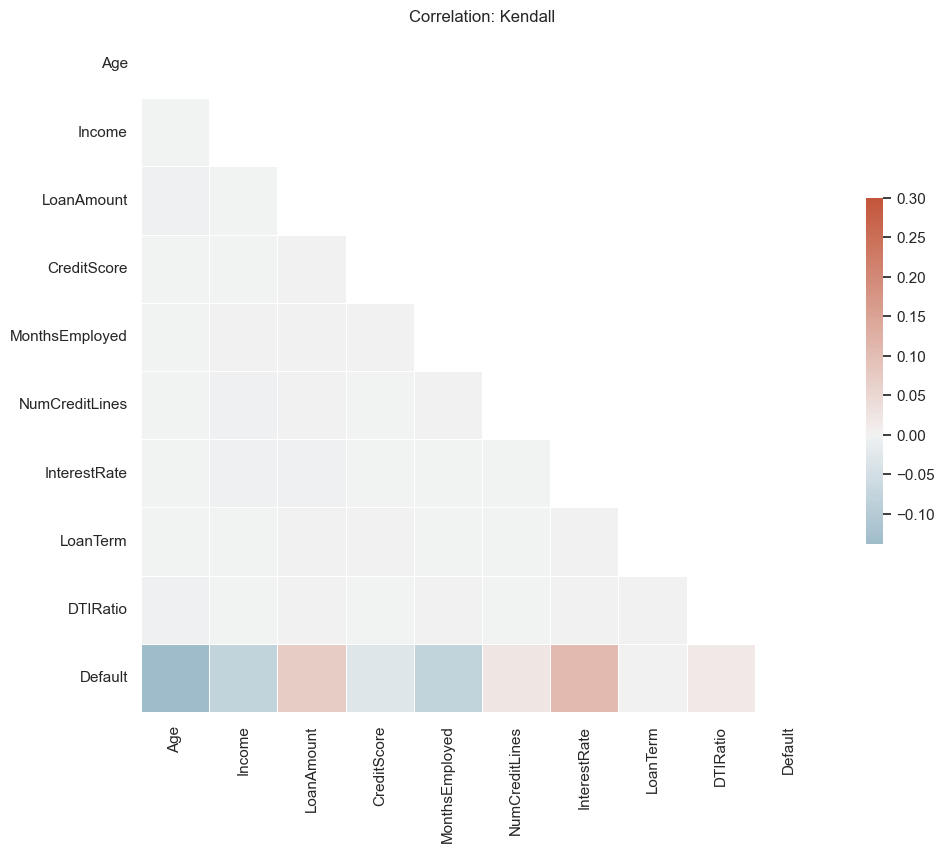

In [119]:
#evaluation correlation between features using Kendall method
corr_display(data.select_dtypes(exclude='object'), 'kendall')

# 8. Target Variable Exploration

The dataset has 2 classes, which correspond to whether an individual defaulted or not. We will now explore their distribution.

c:\Users\mpumi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mpumi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mpumi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


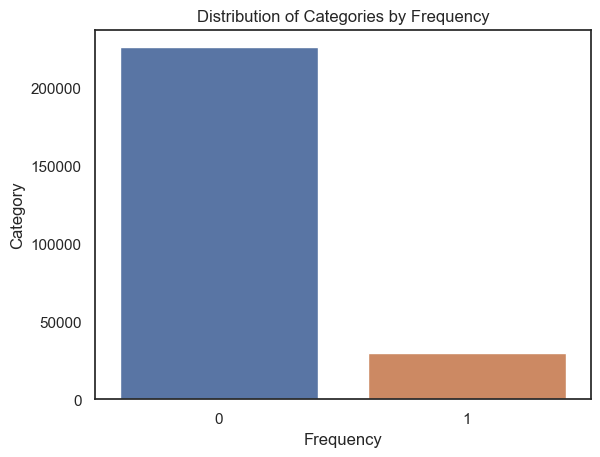

In [120]:
#count of categories
sns.countplot(x = 'Default', data = data)
plt.xlabel('Frequency')
plt.ylabel('Category')
plt.title('Distribution of Categories by Frequency')
plt.show()

In [121]:
data['Default'].value_counts(normalize=True)*100

Default
0    88.387175
1    11.612825
Name: proportion, dtype: float64

# 9. Dropping Unique Identifiers

In [122]:
data.head()

LoanID  Age  Income  LoanAmount  CreditScore  MonthsEmployed  \
0  I38PQUQS96   56   85994       50587          520              80   
1  HPSK72WA7R   69   50432      124440          458              15   
2  C1OZ6DPJ8Y   46   84208      129188          451              26   
3  V2KKSFM3UN   32   31713       44799          743               0   
4  EY08JDHTZP   60   20437        9139          633               8   

   NumCreditLines  InterestRate  LoanTerm  DTIRatio    Education  \
0               4         15.23        36      0.44   Bachelor's   
1               1          4.81        60      0.68     Master's   
2               3         21.17        24      0.31     Master's   
3               3          7.07        24      0.23  High School   
4               4          6.51        48      0.73   Bachelor's   

  EmploymentType MaritalStatus HasMortgage HasDependents LoanPurpose  \
0      Full-time      Divorced         Yes           Yes       Other   
1      Full-time       Married          No            No       Other   
2     Unemployed      Divorced         Yes           Yes        Auto   
3      Full-time       Married          No            No    Business   
4     Unemployed      Divorced          No           Yes        Auto   

  HasCoSigner  Default  
0         Yes        0  
1         Yes        0  
2          No        1  
3          No        0  
4          No        0

In [123]:
#dropping columns
data.drop(columns = ['LoanID'], inplace = True)

# 10. Split the Data into Train and Test Sets

In [124]:
#split the dataset (by means of stratied sampling)
X_train, X_test, y_train, y_test = train_test_split(data.drop('Default', axis = 1), data['Default'], 
                                                    test_size = 0.3, 
                                                    random_state = 42, 
                                                    stratify= data['Default'].values)

In [125]:
#save training data to interim folder 
data_train = pd.concat([X_train, y_train], axis = 1 ).to_csv(r'C:\Users\mpumi\Desktop\Masters Thesis Experiments\Applications of TN - Tabular Datasets\Otto or Loan Dataset\data\interim\loan_default_train.csv',
                                                             index = False)

In [126]:
#save test data to interim folder 
data_test = pd.concat([X_test,y_test], axis = 1).to_csv(r'C:\Users\mpumi\Desktop\Masters Thesis Experiments\Applications of TN - Tabular Datasets\Otto or Loan Dataset\data\interim\loan_default_test.csv',
                                              index = False)

In [128]:
#load the data 
data_train = pd.read_csv(r'C:\Users\mpumi\Desktop\Masters Thesis Experiments\Applications of TN - Tabular Datasets\Otto or Loan Dataset\data\interim\loan_default_train.csv')

# 11. Feature Engineering

## 11.1. Encoding Features

In [129]:
data_train.head()

Age  Income  LoanAmount  CreditScore  MonthsEmployed  NumCreditLines  \
0   21  146859      151128          839             105               2   
1   36  119736       69073          318              92               1   
2   49  125723      246595          795              43               4   
3   35  112778      184288          782               8               4   
4   50   68145       99936          346             116               2   

   InterestRate  LoanTerm  DTIRatio    Education EmploymentType MaritalStatus  \
0         15.67        24      0.68          PhD      Full-time      Divorced   
1          2.58        48      0.79  High School  Self-employed      Divorced   
2         18.94        12      0.83   Bachelor's     Unemployed       Married   
3          8.39        24      0.36          PhD      Full-time       Married   
4         17.12        60      0.51  High School      Full-time        Single   

  HasMortgage HasDependents LoanPurpose HasCoSigner  Default  
0          No            No   Education         Yes        0  
1          No           Yes       Other         Yes        0  
2          No           Yes    Business          No        0  
3         Yes            No        Home          No        0  
4         Yes           Yes    Business         Yes        0

In [136]:
#encoding of categorical features
data_train.select_dtypes(include='object')

MaritalStatus LoanPurpose
0           Divorced   Education
1           Divorced       Other
2            Married    Business
3            Married        Home
4             Single    Business
...              ...         ...
178737      Divorced    Business
178738       Married        Auto
178739        Single        Auto
178740      Divorced       Other
178741        Single   Education

[178742 rows x 2 columns]

In [131]:
#encoding Education feature
education_dict = {"High School":0,
                  "Bachelor's":1,
                  "Master's":2,
                  "PhD":3
                }

data_train['Education'] = data_train['Education'].map(education_dict)

In [132]:
#encooding EmploymentType feature
emp_type_dict = {'Unemployed':0,
                'Self-employed':1,
                'Part-time':2,  
                'Full-time':3
                }
 
data_train['EmploymentType'] =  data_train['EmploymentType'].map(emp_type_dict)

In [133]:
#encoding HasMortgage feature
has_mortage_dict = {'No':0,
                    'Yes':1}

data_train['HasMortgage'] = data_train['HasMortgage'].map(has_mortage_dict)

In [134]:
#encoding HasDependents feature
has_dep_dict = {'No':0,
                'Yes':1}

data_train['HasDependents'] = data_train['HasDependents'].map(has_mortage_dict)

In [135]:
#encoding HasCoSigner feature
has_cosign_dict = {'No':0,
                   'Yes':1}

data_train['HasCoSigner'] = data_train['HasCoSigner'].map(has_mortage_dict)

In [137]:
#encoding marital status
ohe_marital = OneHotEncoder()

X_marital_encoded = ohe_marital.fit_transform(data_train['MaritalStatus'].values.reshape(-1,1))

data_train[[str(col) + "_Flag" for col in ohe_marital.categories_[0]]] = X_marital_encoded.toarray().astype(int)

In [138]:
#save one hot encoder for Marital Status
joblib.dump(ohe_marital, r"C:\Users\mpumi\Desktop\Masters Thesis Experiments\Applications of TN - Tabular Datasets\Otto or Loan Dataset\results\objects_test\ohe_marital_status.joblib")

['C:\\Users\\mpumi\\Desktop\\Masters Thesis Experiments\\Applications of TN - Tabular Datasets\\Otto or Loan Dataset\\results\\objects_test\\ohe_marital_status.joblib']

In [139]:
data_train.drop(columns = ['MaritalStatus'], axis = 1, inplace = True)

In [140]:
#encoding LoanPurpose feature
ohe_loan_pur = OneHotEncoder()

X_loan_pur_encoded = ohe_loan_pur.fit_transform(data_train['LoanPurpose'].values.reshape(-1,1))

data_train[[str(col) + "_Loan" for col in ohe_loan_pur.categories_[0]]] = X_loan_pur_encoded.toarray().astype(int)

In [141]:
#save one hot encoder for Loan purpose
joblib.dump(ohe_loan_pur, r"C:\Users\mpumi\Desktop\Masters Thesis Experiments\Applications of TN - Tabular Datasets\Otto or Loan Dataset\results\objects_test\ohe_loan_pur_status.joblib")

['C:\\Users\\mpumi\\Desktop\\Masters Thesis Experiments\\Applications of TN - Tabular Datasets\\Otto or Loan Dataset\\results\\objects_test\\ohe_loan_pur_status.joblib']

In [142]:
data_train.drop(columns = ['LoanPurpose'], axis = 1, inplace = True)

In [143]:
#encoding LoanTerm features
loan_term = {12: 0, 24: 1, 36: 2, 48: 3, 60: 4}

data_train['LoanTerm'] = data_train['LoanTerm'].map(loan_term)

In [144]:
data_train.head()

Age  Income  LoanAmount  CreditScore  MonthsEmployed  NumCreditLines  \
0   21  146859      151128          839             105               2   
1   36  119736       69073          318              92               1   
2   49  125723      246595          795              43               4   
3   35  112778      184288          782               8               4   
4   50   68145       99936          346             116               2   

   InterestRate  LoanTerm  DTIRatio  Education  EmploymentType  HasMortgage  \
0         15.67         1      0.68          3               3            0   
1          2.58         3      0.79          0               1            0   
2         18.94         0      0.83          1               0            0   
3          8.39         1      0.36          3               3            1   
4         17.12         4      0.51          0               3            1   

   HasDependents  HasCoSigner  Default  Divorced_Flag  Married_Flag  \
0              0            1        0              1             0   
1              1            1        0              1             0   
2              1            0        0              0             1   
3              0            0        0              0             1   
4              1            1        0              0             0   

   Single_Flag  Auto_Loan  Business_Loan  Education_Loan  Home_Loan  \
0            0          0              0               1          0   
1            0          0              0               0          0   
2            0          0              1               0          0   
3            0          0              0               0          1   
4            1          0              1               0          0   

   Other_Loan  
0           0  
1           1  
2           0  
3           0  
4           0

## 11.2. Scaling Features

In [145]:
#features to normalise/scale
scale_cols = ['DTIRatio', 'InterestRate', 'MonthsEmployed', 'CreditScore', 'LoanAmount', 'Income', 'Age']

In [146]:
for col in scale_cols:
    
    max_scaler = MinMaxScaler()
    
    data_train[col] = max_scaler.fit_transform(data_train[col].values.reshape(-1,1))
    
    path = rf"C:\Users\mpumi\Desktop\Masters Thesis Experiments\Applications of TN - Tabular Datasets\Otto or Loan Dataset\results\objects_test\ohe_{col}.joblib"
    
    joblib.dump(max_scaler, path)

In [147]:
data_train.head()

Age    Income  LoanAmount  CreditScore  MonthsEmployed  \
0  0.058824  0.976741    0.596443     0.981785        0.882353   
1  0.352941  0.775828    0.261524     0.032787        0.773109   
2  0.607843  0.820176    0.986106     0.901639        0.361345   
3  0.333333  0.724287    0.731791     0.877960        0.067227   
4  0.627451  0.393670    0.387495     0.083789        0.974790   

   NumCreditLines  InterestRate  LoanTerm  DTIRatio  Education  \
0               2      0.594348         1    0.7250          3   
1               1      0.025217         3    0.8625          0   
2               4      0.736522         0    0.9125          1   
3               4      0.277826         1    0.3250          3   
4               2      0.657391         4    0.5125          0   

   EmploymentType  HasMortgage  HasDependents  HasCoSigner  Default  \
0               3            0              0            1        0   
1               1            0              1            1        0   
2               0            0              1            0        0   
3               3            1              0            0        0   
4               3            1              1            1        0   

   Divorced_Flag  Married_Flag  Single_Flag  Auto_Loan  Business_Loan  \
0              1             0            0          0              0   
1              1             0            0          0              0   
2              0             1            0          0              1   
3              0             1            0          0              0   
4              0             0            1          0              1   

   Education_Loan  Home_Loan  Other_Loan  
0               1          0           0  
1               0          0           1  
2               0          0           0  
3               0          1           0  
4               0          0           0

## 11.3. Binning Features

------------------------DTIRatio-------------------------
-------------------Iteration---------------- : 1
-------------------Iteration---------------- : 2
-------------------Iteration---------------- : 3
-------------------Iteration---------------- : 4
-------------------Iteration---------------- : 5
-------------------Iteration---------------- : 6
-------------------Iteration---------------- : 7
-------------------Iteration---------------- : 8
-------------------Iteration---------------- : 9


c:\Users\mpumi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mpumi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mpumi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mpumi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na opti

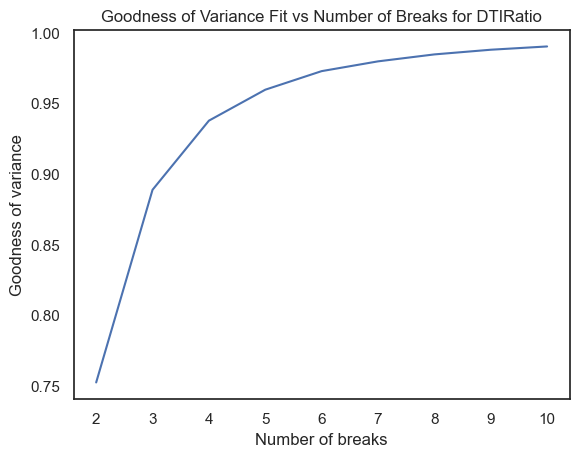

------------------------InterestRate-------------------------
-------------------Iteration---------------- : 1
-------------------Iteration---------------- : 2
-------------------Iteration---------------- : 3
-------------------Iteration---------------- : 4
-------------------Iteration---------------- : 5
-------------------Iteration---------------- : 6
-------------------Iteration---------------- : 7
-------------------Iteration---------------- : 8
-------------------Iteration---------------- : 9


c:\Users\mpumi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mpumi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mpumi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mpumi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na opti

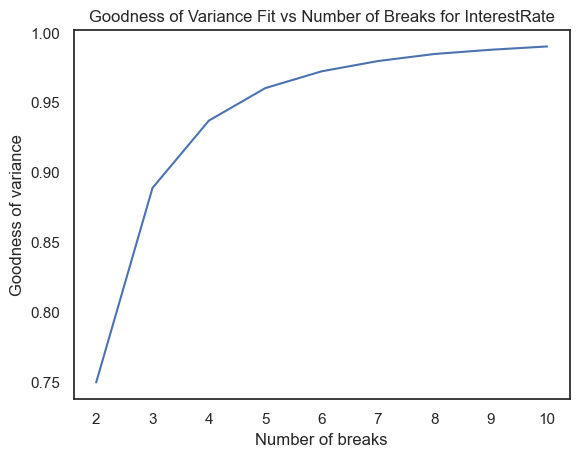

------------------------MonthsEmployed-------------------------
-------------------Iteration---------------- : 1
-------------------Iteration---------------- : 2
-------------------Iteration---------------- : 3
-------------------Iteration---------------- : 4
-------------------Iteration---------------- : 5
-------------------Iteration---------------- : 6
-------------------Iteration---------------- : 7
-------------------Iteration---------------- : 8
-------------------Iteration---------------- : 9


c:\Users\mpumi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mpumi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mpumi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mpumi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na opti

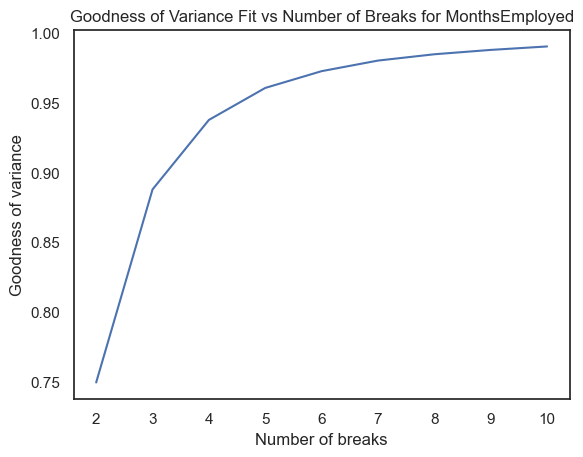

------------------------CreditScore-------------------------
-------------------Iteration---------------- : 1
-------------------Iteration---------------- : 2
-------------------Iteration---------------- : 3
-------------------Iteration---------------- : 4
-------------------Iteration---------------- : 5
-------------------Iteration---------------- : 6
-------------------Iteration---------------- : 7
-------------------Iteration---------------- : 8
-------------------Iteration---------------- : 9


c:\Users\mpumi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mpumi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mpumi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mpumi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na opti

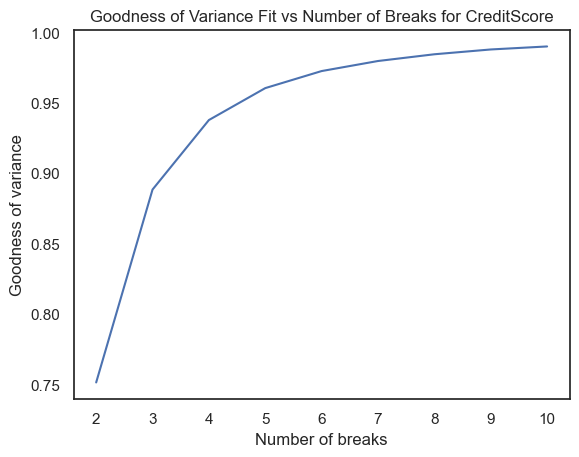

------------------------LoanAmount-------------------------
-------------------Iteration---------------- : 1
-------------------Iteration---------------- : 2
-------------------Iteration---------------- : 3
-------------------Iteration---------------- : 4
-------------------Iteration---------------- : 5
-------------------Iteration---------------- : 6
-------------------Iteration---------------- : 7
-------------------Iteration---------------- : 8
-------------------Iteration---------------- : 9


c:\Users\mpumi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mpumi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mpumi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mpumi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na opti

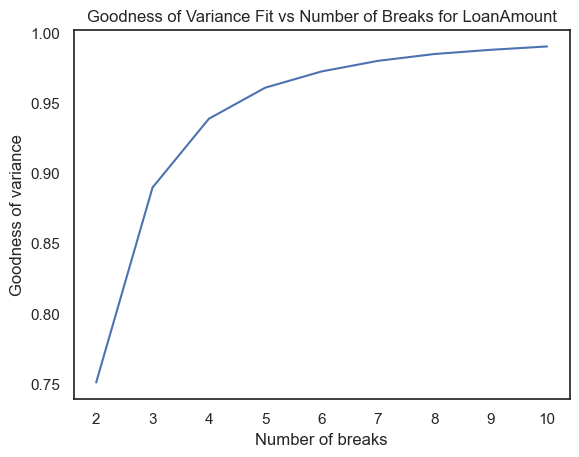

------------------------Income-------------------------
-------------------Iteration---------------- : 1
-------------------Iteration---------------- : 2
-------------------Iteration---------------- : 3
-------------------Iteration---------------- : 4
-------------------Iteration---------------- : 5
-------------------Iteration---------------- : 6
-------------------Iteration---------------- : 7
-------------------Iteration---------------- : 8
-------------------Iteration---------------- : 9


c:\Users\mpumi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mpumi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mpumi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mpumi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na opti

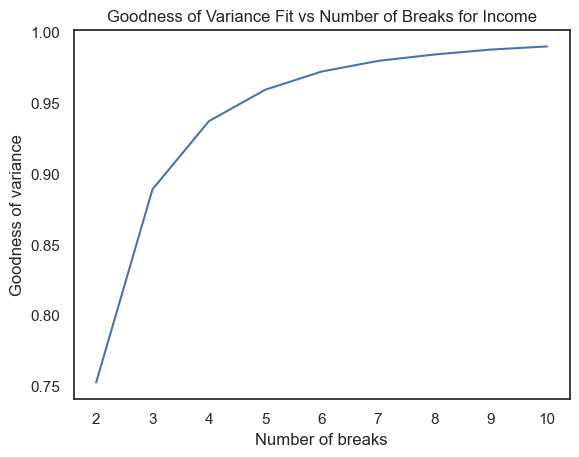

------------------------Age-------------------------
-------------------Iteration---------------- : 1
-------------------Iteration---------------- : 2
-------------------Iteration---------------- : 3
-------------------Iteration---------------- : 4
-------------------Iteration---------------- : 5
-------------------Iteration---------------- : 6
-------------------Iteration---------------- : 7
-------------------Iteration---------------- : 8
-------------------Iteration---------------- : 9


c:\Users\mpumi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mpumi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mpumi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mpumi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na opti

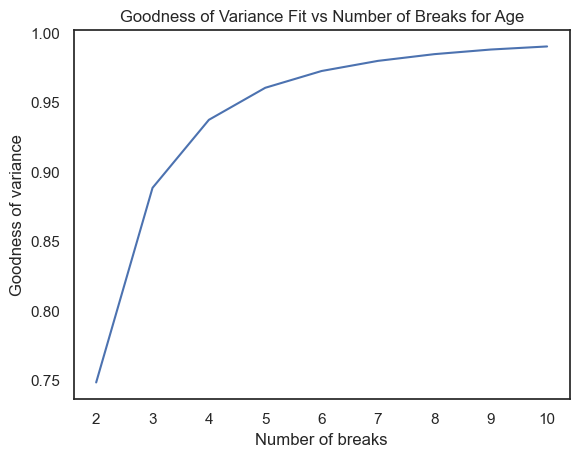

In [148]:
for col in scale_cols:
    
    #apply discretisation via natural breaks (first parameter search)
    goodness_of_variance = []
    n_classes = 10

    print(f'------------------------{col}-------------------------')

    for n in range(2,n_classes+1):
        
        print('-------------------Iteration---------------- :', n-1)
        
        jenks = jenkspy.JenksNaturalBreaks(n)
        
        sample = data_train[col].sample(20000)
        
        jenks.fit(sample.values)

        goodness_of_variance.append(jenks.goodness_of_variance_fit(sample.values))
        
    #finding the optimal bins
    sns.lineplot(x = list(range(2,len(goodness_of_variance)+2)),
                y = goodness_of_variance)
    plt.title(f'Goodness of Variance Fit vs Number of Breaks for {col}')
    plt.xlabel('Number of breaks')
    plt.ylabel('Goodness of variance')
    plt.show()

In [149]:
#fit the breaks
for col in scale_cols:
    
    jenks = jenkspy.JenksNaturalBreaks(n_classes=6)

    jenks.fit(data_train[col].values)

    data_train[col] = jenks.labels_

In [150]:
data_train.isna().sum().sum()

0

In [151]:
data_train.head()

Age  Income  LoanAmount  CreditScore  MonthsEmployed  NumCreditLines  \
0    0       5           3            5               5               2   
1    2       4           1            0               4               1   
2    3       4           5            5               2               4   
3    1       4           4            5               0               4   
4    3       2           2            0               5               2   

   InterestRate  LoanTerm  DTIRatio  Education  EmploymentType  HasMortgage  \
0             3         1         4          3               3            0   
1             0         3         5          0               1            0   
2             4         0         5          1               0            0   
3             1         1         1          3               3            1   
4             3         4         3          0               3            1   

   HasDependents  HasCoSigner  Default  Divorced_Flag  Married_Flag  \
0              0            1        0              1             0   
1              1            1        0              1             0   
2              1            0        0              0             1   
3              0            0        0              0             1   
4              1            1        0              0             0   

   Single_Flag  Auto_Loan  Business_Loan  Education_Loan  Home_Loan  \
0            0          0              0               1          0   
1            0          0              0               0          0   
2            0          0              1               0          0   
3            0          0              0               0          1   
4            1          0              1               0          0   

   Other_Loan  
0           0  
1           1  
2           0  
3           0  
4           0

## 12. Feature Selection

### 12.1. Feature Importance

We will use the mutual infomation regression since it captures the dependency between the feature and target variable. These algorithms are use to evaluate feature importance, which is used for feature selection


#### Boruta

In [152]:
X = data_train.drop(columns = 'Default', axis = 1)
y = data_train['Default']

In [153]:
clf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42, class_weight='balanced')

In [154]:
feat_selector = BorutaPy(
    verbose= 0,
    estimator= clf,
    n_estimators='auto',
    max_iter=50,
    random_state= 42
)

In [155]:
feat_selector.fit(np.array(X), np.array(y))

BorutaPy(estimator=RandomForestClassifier(class_weight='balanced', max_depth=5,
                                          n_estimators=116,
                                          random_state=RandomState(MT19937) at 0x1978FAE7640),
         max_iter=50, n_estimators='auto',
         random_state=RandomState(MT19937) at 0x1978FAE7640)

In [156]:
X.columns[feat_selector.support_]

Index(['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
       'NumCreditLines', 'InterestRate', 'DTIRatio', 'Education',
       'EmploymentType', 'HasMortgage', 'HasDependents', 'HasCoSigner',
       'Divorced_Flag', 'Married_Flag', 'Home_Loan'],
      dtype='object')

In [157]:
print(X.columns[feat_selector.support_weak_])

Index([], dtype='object')


In [158]:
set(X.columns) - set(X.columns[feat_selector.support_]) - set(X.columns[feat_selector.support_weak_])

{'Auto_Loan',
 'Business_Loan',
 'Education_Loan',
 'LoanTerm',
 'Other_Loan',
 'Single_Flag'}

#### Information Gain

In [159]:
#mutual information
mi_scores = mutual_info_classif(data_train.drop('Default', axis = 1), data_train['Default'])

In [160]:
#convert into series
mi_scores = pd.Series(mi_scores)
mi_scores.index = data_train.drop('Default', axis = 1).columns

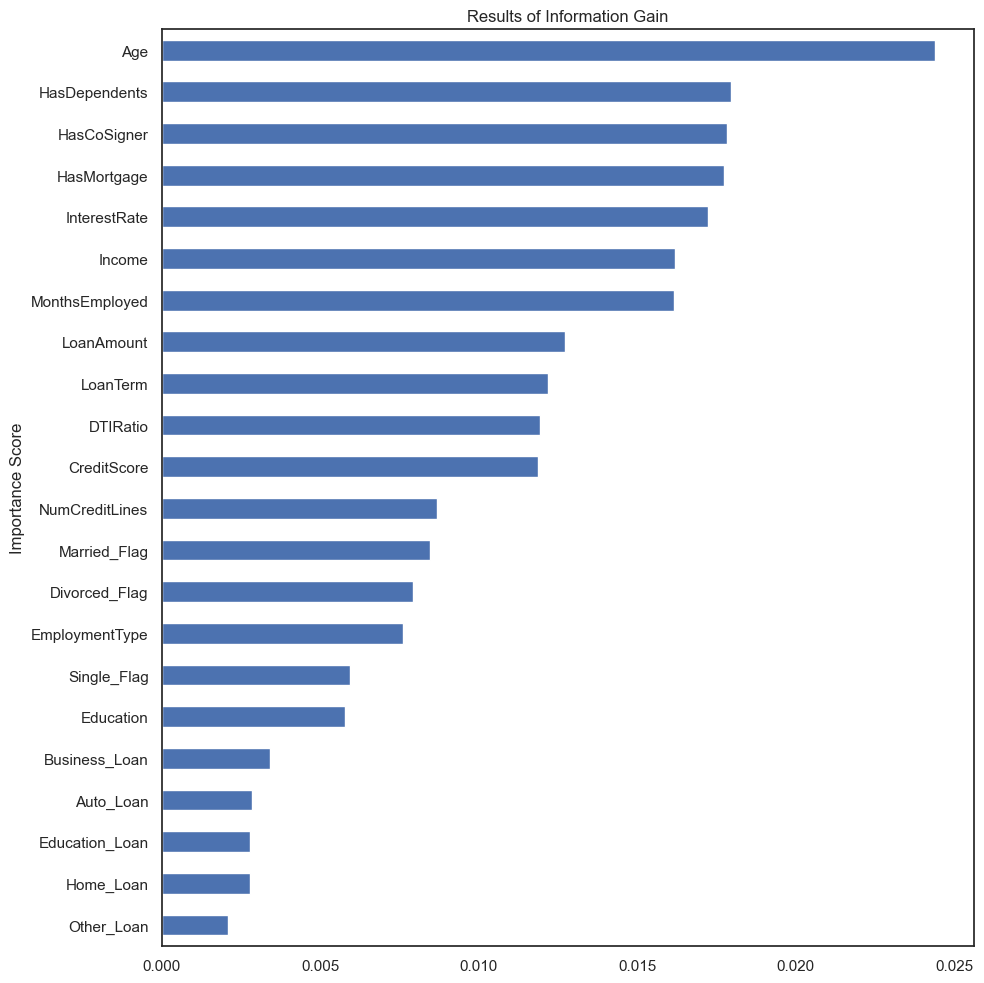

In [161]:
#plottin gthe mutual information of the top 20 features
plt.figure(figsize = (10,10))
mi_scores.sort_values()[:30].plot.barh()
plt.ylabel('Importance Score')
plt.title('Results of Information Gain')
plt.tight_layout()
plt.show()

Comment: Feature 85, 29, 70, 52, 23, 45, 74, 21,and 1 have the most information gain in regards to the target variable. The graph shows a sudden decrease in information gain after the 19th feature, which shows only a small subset of the features carries valuable infromation of the target variable.

### Embedded Methods - Random Forest

In [162]:
#random forest
model_ran = RandomForestClassifier(class_weight = 'balanced', criterion = 'entropy', random_state= 42)

#fit the model
model_ran.fit(data_train.drop('Default', axis = 1), data_train['Default'])

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       random_state=42)

In [164]:
#convert into series
feat_import = pd.Series(model_ran.feature_importances_)

feat_import.index = data_train.drop('Default', axis = 1).columns

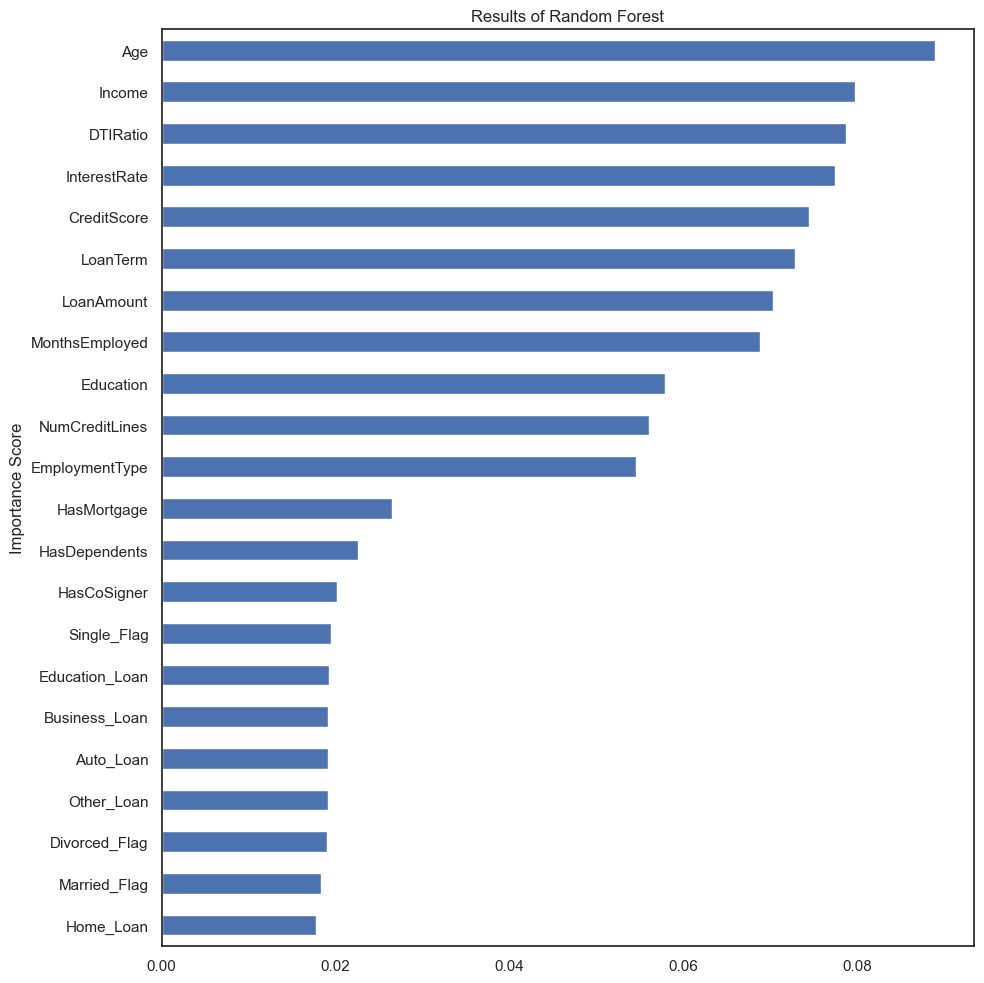

In [165]:
#plottin gthe mutual information of the top 20 features
plt.figure(figsize = (10,10))
feat_import.sort_values()[:30].plot.barh()
plt.ylabel('Importance Score')
plt.title('Results of Random Forest')
plt.tight_layout()
plt.show()

Comment: According to the random forest classifier, the most important feature are: 19, 65, 23, 63, 49, 46, 27, 81. There is only one overlap between feature importance scores indicated by mutual information and random forest classifier: feature 23.

## 8. Dimensionality Reduction/ Variable Clustering

In [166]:
selected_features = ['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
       'NumCreditLines', 'InterestRate', 'DTIRatio', 'Education', 'LoanTerm',
       'EmploymentType', 'HasMortgage', 'HasDependents', 'HasCoSigner',
       'Divorced_Flag', 'Married_Flag', 'Home_Loan', 'Default']

In [167]:
df_final_train = data_train[selected_features]

#### Principal Component Analysis

In [173]:
df_dim = pd.concat([df_final_train[df_final_train['Default']==0].sample(n = 20000, replace = False), df_final_train[df_final_train['Default']==1].sample(n = 20000, replace = False)], axis = 'rows')

In [174]:
df_dim = df_dim.sample(frac = 1).reset_index(drop = True)

In [175]:
df_dim

Age  Income  LoanAmount  CreditScore  MonthsEmployed  NumCreditLines  \
0        0       5           3            3               4               1   
1        2       4           5            2               2               1   
2        0       3           3            4               1               3   
3        2       4           4            4               1               4   
4        3       2           2            0               4               4   
...    ...     ...         ...          ...             ...             ...   
39995    2       5           2            1               2               3   
39996    0       0           5            5               2               3   
39997    5       0           4            2               2               2   
39998    1       1           1            3               4               4   
39999    5       0           1            3               4               4   

       InterestRate  DTIRatio  Education  LoanTerm  EmploymentType  \
0                 0         4          1         4               2   
1                 3         4          2         0               1   
2                 5         0          3         0               1   
3                 3         5          0         3               3   
4                 0         3          0         0               3   
...             ...       ...        ...       ...             ...   
39995             4         0          0         0               2   
39996             5         2          3         0               1   
39997             5         1          3         2               3   
39998             5         5          1         0               0   
39999             4         1          0         1               3   

       HasMortgage  HasDependents  HasCoSigner  Divorced_Flag  Married_Flag  \
0                0              0            1              0             0   
1                0              1            1              0             0   
2                0              1            0              0             0   
3                0              1            0              0             0   
4                1              0            1              1             0   
...            ...            ...          ...            ...           ...   
39995            1              1            0              1             0   
39996            1              1            1              1             0   
39997            0              0            0              0             1   
39998            1              1            0              0             0   
39999            1              0            0              1             0   

       Home_Loan  Default  
0              1        0  
1              0        0  
2              1        0  
3              0        1  
4              0        0  
...          ...      ...  
39995          1        0  
39996          0        1  
39997          0        1  
39998          0        0  
39999          1        0  

[40000 rows x 18 columns]

In [176]:
#implementing PCA
pca = PCA(n_components = 15)
pca_result = pca.fit_transform(df_dim.drop('Default', axis = 1).values)

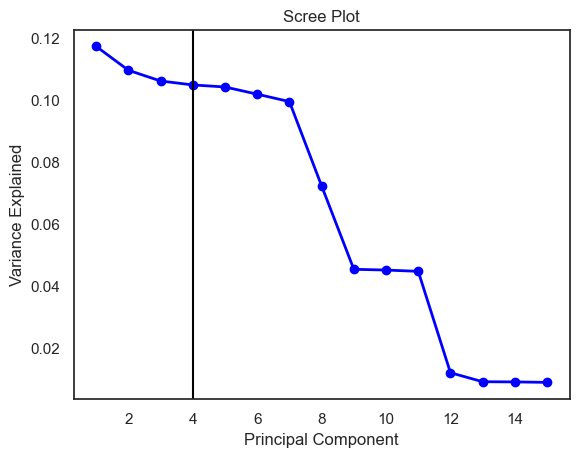

In [177]:
#scree plot
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.axvline( x =4, color = 'black')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

Comment: Using the elbow heuristic, we see that the optimal number of PC components is between 3 and 4. We will only visualise 2 PCs and explore the explained variance of the top 4.

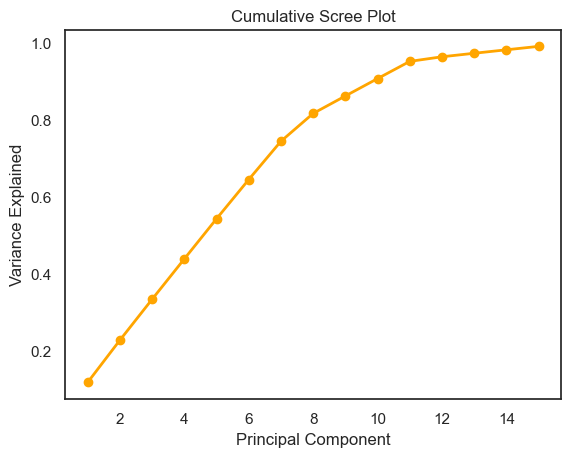

In [178]:
#cumulative variance
plt.plot(PC_values, np.cumsum(pca.explained_variance_ratio_) , 'o-', linewidth=2, color='orange')
plt.title('Cumulative Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

Comment: From the cumulative plot, the first 3 PCs explain about 25% of the total variance, while the frst 4 account for about 30% of the variance.

In [179]:
for i in range(4):
    print('Explained variation for PC {} principal component is {}%.'.format(i+1, round(pca.explained_variance_ratio_[i] * 100, 2)))

Explained variation for PC 1 principal component is 11.74%.
Explained variation for PC 2 principal component is 10.96%.
Explained variation for PC 3 principal component is 10.62%.
Explained variation for PC 4 principal component is 10.49%.


In [180]:
#plottin the PCA
data_train_pca = pd.DataFrame()

In [183]:
data_train_pca['PC_1'] = pca_result[:,0]
data_train_pca['PC_2'] = pca_result[:,1]
data_train_pca['PC_3'] = pca_result[:,2]
data_train_pca['PC_4'] = pca_result[:,3]
data_train_pca['Default'] = df_dim['Default']

In [184]:
#viewing the PCA dataframe
data_train_pca.head()

PC_1      PC_2      PC_3      PC_4  Default
0  1.892123 -0.675307 -0.958237 -2.439405        0
1 -0.377394 -0.684201 -1.142838 -0.257253        0
2 -1.054124 -1.844846  3.364207 -1.691716        0
3  0.072434 -1.113829 -2.062765 -1.882068        1
4  1.360540  1.469753 -0.924856  1.993109        0

Comment: It is clear that PCA is failing to fully discriminate salient features from the dataset since the data is not linearly separable, whereas PCA is a linear method. We will explore a non-linear method (manifold learning) called t-SNE.

c:\Users\mpumi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mpumi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mpumi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mpumi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

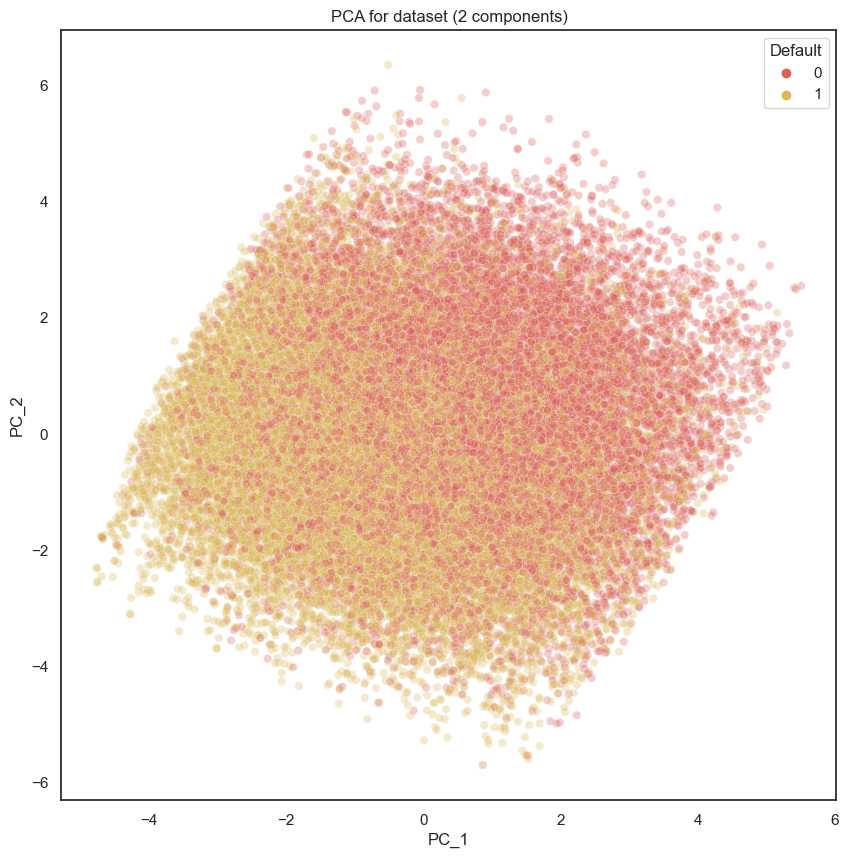

In [185]:
#In 2d
plt.figure(figsize=(10,10))
sns.scatterplot(
    x = 'PC_1',
    y= 'PC_2',
    hue = 'Default',
    palette= sns.color_palette('hls', 9),
    data = data_train_pca,
    legend= 'full',
    alpha = 0.3
)
plt.title("PCA for dataset (2 components)")
plt.show()

#### t-Distributed Stochastic Neighbours (t-SNE)

In [186]:
#implementing t-SNE ( PCA initialisation)
tsne = TSNE(n_components = 2, verbose= 1, perplexity= 45, init = 'pca', n_iter= 400)
tsne_results = tsne.fit_transform(df_dim.drop('Default', axis = 1))

[t-SNE] Computing 136 nearest neighbors...
[t-SNE] Indexed 40000 samples in 0.007s...


[t-SNE] Computed neighbors for 40000 samples in 4.115s...
[t-SNE] Computed conditional probabilities for sample 1000 / 40000
[t-SNE] Computed conditional probabilities for sample 2000 / 40000
[t-SNE] Computed conditional probabilities for sample 3000 / 40000
[t-SNE] Computed conditional probabilities for sample 4000 / 40000
[t-SNE] Computed conditional probabilities for sample 5000 / 40000
[t-SNE] Computed conditional probabilities for sample 6000 / 40000
[t-SNE] Computed conditional probabilities for sample 7000 / 40000
[t-SNE] Computed conditional probabilities for sample 8000 / 40000
[t-SNE] Computed conditional probabilities for sample 9000 / 40000
[t-SNE] Computed conditional probabilities for sample 10000 / 40000
[t-SNE] Computed conditional probabilities for sample 11000 / 40000
[t-SNE] Computed conditional probabilities for sample 12000 / 40000
[t-SNE] Computed conditional probabilities for sample 13000 / 40000
[t-SNE] Computed conditional probabilities for sample 14000 / 40000

In [187]:
#creating tnse dataframe for results
data_train_tsne = pd.DataFrame()

data_train_tsne['tsne_one'] = tsne_results[:,0]
data_train_tsne['tsne_two'] = tsne_results[:,1]
data_train_tsne['Default'] = df_dim['Default'].values

In [188]:
#viewing tse results
data_train_tsne.head()

tsne_one   tsne_two  Default
0  18.823122 -12.455958        0
1  -1.202608 -33.795254        0
2  -4.162349 -27.600061        0
3   2.861052 -29.256748        1
4  36.883778   1.892376        0

c:\Users\mpumi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mpumi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mpumi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mpumi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

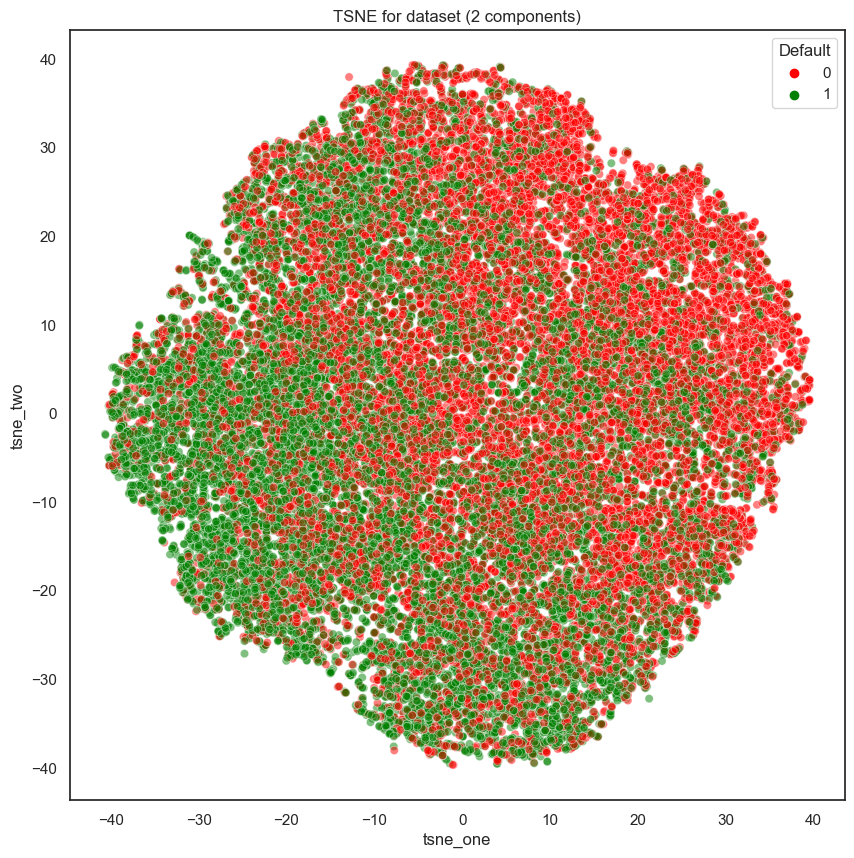

In [189]:
plt.figure(figsize= (10,10))
sns.scatterplot(
    x = 'tsne_one',
    y= 'tsne_two',
    hue = 'Default',
    palette= ['red', 'green'],
    data = data_train_tsne,
    legend = 'full',
    alpha = 0.5
)
plt.title("TSNE for dataset (2 components)")
plt.show()

Comment: t-SNE significantly improves on PCA, we can see that a number of targets can be separated (to a certain degree) : 4,5,7,and 8. While the remaining classes overlap and are hard to seperate.

#### UMAP

In [190]:
#using UMAP
umap_reduce = UMAP(n_neighbors = 50,
                   min_dist = 0.2,
                   n_components = 2,
                   metric = 'hamming')

In [191]:
embedding = umap_reduce.fit_transform(df_dim.drop('Default', axis = 1))

c:\Users\mpumi\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\umap_.py:1802: UserWarning: gradient function is not yet implemented for hamming distance metric; inverse_transform will be unavailable
  warn(


In [192]:
embed_df = pd.DataFrame()
embed_df['UMAP_1'] = embedding[:,0]
embed_df['UMAP_2'] = embedding[:,1]
embed_df['Target'] = df_dim['Default'].values

c:\Users\mpumi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mpumi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mpumi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mpumi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

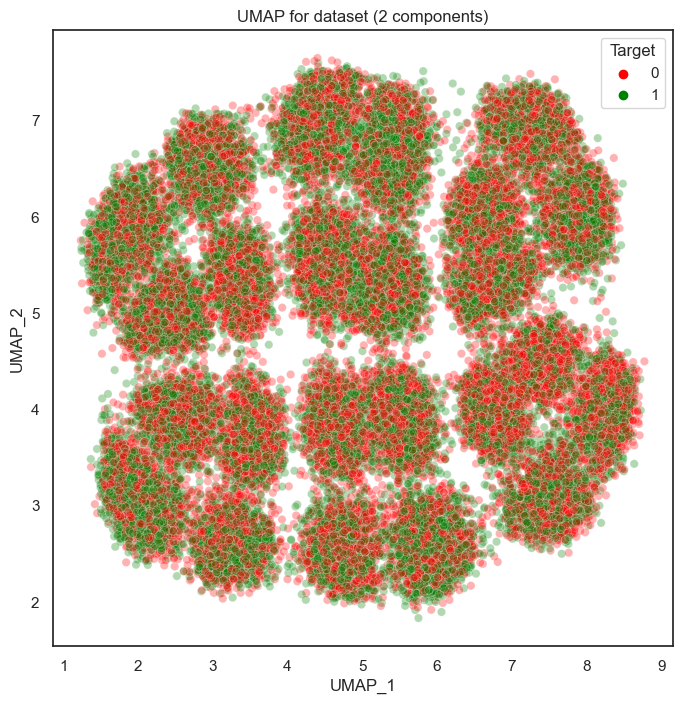

In [193]:
#In 2d
plt.figure(figsize=(8,8))
sns.scatterplot(
    x = 'UMAP_1',
    y= 'UMAP_2',
    hue = 'Target',
    palette= ['red', 'green'],
    data = embed_df,
    legend= 'full',
    alpha = 0.3
)
plt.title("UMAP for dataset (2 components)")
plt.savefig('UMAP Dimesionality Reduction.png')
plt.show()

## 9. Save Dataset

In [1]:
df_final_train.to_csv(r'C:\Users\mpumi\Desktop\Masters Thesis Experiments\Applications of TN - Tabular Datasets\Otto or Loan Dataset\data\processed\loan_default_processed_train.csv', index = False)

NameError: name 'df_final_train' is not defined

In [195]:
df_final_train.head()

Age  Income  LoanAmount  CreditScore  MonthsEmployed  NumCreditLines  \
0    0       5           3            5               5               2   
1    2       4           1            0               4               1   
2    3       4           5            5               2               4   
3    1       4           4            5               0               4   
4    3       2           2            0               5               2   

   InterestRate  DTIRatio  Education  LoanTerm  EmploymentType  HasMortgage  \
0             3         4          3         1               3            0   
1             0         5          0         3               1            0   
2             4         5          1         0               0            0   
3             1         1          3         1               3            1   
4             3         3          0         4               3            1   

   HasDependents  HasCoSigner  Divorced_Flag  Married_Flag  Home_Loan  Default  
0              0            1              1             0          0        0  
1              1            1              1             0          0        0  
2              1            0              0             1          0        0  
3              0            0              0             1          1        0  
4              1            1              0             0          0        0